# Understanding Data, and Data Preprocessing

Files: <br>

- stations-i880n.csv: detector station information
- flow_speed_{num}.csv: num = 1, 2, 3; traffic flow and speed information
- occ_{num}.csv: num = 1, 2, 3; occupancy information.

In [1]:
import pandas as pd

In [2]:
stations = pd.read_csv("data/I88N/stations-i880n.csv")

In [3]:
stations.columns

Index(['Fwy', 'District', 'County', 'City', 'CA PM', 'Abs PM', 'Length', 'ID',
       'Name', 'Lanes', 'Type', 'Sensor Type', 'HOV', 'MS ID', 'IRM'],
      dtype='object')

In [4]:
stations.ftypes

Fwy             object:dense
District         int64:dense
County          object:dense
City            object:dense
CA PM           object:dense
Abs PM         float64:dense
Length         float64:dense
ID               int64:dense
Name            object:dense
Lanes            int64:dense
Type            object:dense
Sensor Type     object:dense
HOV             object:dense
MS ID           object:dense
IRM             object:dense
dtype: object

In [5]:
flow_speed_1 = pd.read_csv("data/I88N/flow_speed1.csv")

In [6]:
flow_speed_1.columns

Index(['Station ID', '5 Minutes', 'Flow (Veh/5 Minutes)', 'Speed (mph)',
       '# Lane Points', '% Observed'],
      dtype='object')

In [7]:
occ_1 = pd.read_csv("data/I88N/occ1.csv")

In [8]:
occ_1.columns

Index(['Station ID', '5 Minutes', 'Occupancy (%)', '# Lane Points',
       '% Observed'],
      dtype='object')

In [9]:
stations.loc[stations["ID"] == 408907]

,Fwy,District,County,City,CA PM,Abs PM,Length,ID,Name,Lanes,Type,Sensor Type,HOV,MS ID,IRM
0,I880-N,4,Santa Clara,NaN,0.31,0.31,0.425,408907,SB/NB 280 rm-n-fly/diag,3,Mainline,loops,No,DT596,L3-N-37-880-00031


In [10]:
flow_speed_1.head(5)

,Station ID,5 Minutes,Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed
0,408907,01/01/2017 00:00,95.0,68.8,3,0.0
1,408907,01/01/2017 00:05,91.0,68.4,3,0.0
2,408907,01/01/2017 00:10,91.0,68.4,3,0.0
3,408907,01/01/2017 00:15,86.0,68.5,3,0.0
4,408907,01/01/2017 00:20,82.0,68.5,3,0.0


In [11]:
occ_1.head(5)

,Station ID,5 Minutes,Occupancy (%),# Lane Points,% Observed
0,408907,01/01/2017 00:00,2.1,3,0.0
1,408907,01/01/2017 00:05,2.0,3,0.0
2,408907,01/01/2017 00:10,2.0,3,0.0
3,408907,01/01/2017 00:15,1.9,3,0.0
4,408907,01/01/2017 00:20,1.8,3,0.0


In [89]:
incidents = pd.read_csv("data/I88N/otherIncident.csv")

In [90]:
incidents

,Incident_Id,Start_Time,Duration_(mins),Freeway,CA_PM,Abs_PM,Source,AREA,LOCATION,DESCRIPTION
0,16917059,1/1/17 0:24,3,I880-N,0.4,0.4,CHP,San Jose,I880 N / I280 S I880 N Con,1183-Trfc Collision-Unkn Inj
1,16917196,1/1/17 2:14,14,I880-N,R34.773,45.0,CHP,Oakland,I880 N West Grand Ave Onr / I880 N I80 E Con,1183-Trfc Collision-Unkn Inj
2,16917233,1/1/17 2:44,6,I880-N,3.673,13.9,CHP,Hayward,I880 N / Nimitz Cvef Scale Ofr,1183-Trfc Collision-Unkn Inj
3,16917332,1/1/17 4:31,2,I880-N,20.473,30.7,CHP,Hayward,I880 N / Lewelling Blvd Onr,20002-Hit and Run No Injuries
4,16917615,1/1/17 9:25,12,I880-N,17.273,27.5,CHP,Hayward,I880 N / W Winton Ave Ofr,1125-Traffic Hazard
5,16917677,1/1/17 10:59,43,I880-N,8.573,18.8,CHP,Hayward,I880 N / Thornton Ave Ofr,1125-Traffic Hazard
6,16917744,1/1/17 11:52,9,I880-N,16.373,26.6,CHP,Hayward,I880 N / I880 N Sr92 Con,1125-Traffic Hazard
7,16917873,1/1/17 13:27,10,I880-N,25.673,35.9,CHP,Oakland,I880 N / Hegenberger Rd W Onr,1125A-Animal Hazard
8,16918027,1/1/17 16:11,3,I880-N,15.273,25.5,CHP,Hayward,I880 N / W Tennyson Rd Ofr,1125-Traffic Hazard
9,16918100,1/1/17 17:02,11,I880-N,12.773,23.0,CHP,Hayward,I880 N / Alvarado Niles Rd Ofr,1125-Traffic Hazard


## Sample Data for Testing

In [14]:
# break column `5 minutes` into timestamps, and add date and time columns 
# to flow_speed_1 and occ_1
# sample a few for test
flow_speed_sample = flow_speed_1.sample(n=10, replace=True)

In [16]:
flow_speed_sample

,Station ID,5 Minutes,Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed
2868537,408756,03/22/2017 23:00,159.0,67.4,4,100.0
2194523,401643,08/02/2017 04:40,171.0,73.0,5,100.0
1785913,401489,07/26/2017 04:10,88.0,64.8,4,100.0
1551945,413026,04/08/2017 15:30,545.0,65.3,5,80.0
1110211,402283,12/02/2017 13:55,509.0,61.8,4,100.0
1700157,401464,09/20/2017 08:20,378.0,65.6,4,100.0
3069574,400309,03/15/2017 03:05,48.0,68.2,4,75.0
95545,408907,12/08/2017 19:55,149.0,68.6,3,100.0
3272371,400249,03/13/2017 09:20,392.0,67.7,4,100.0
470930,400343,08/17/2017 12:20,353.0,61.9,3,66.7


In [17]:
flow_speed_sample["5 Minutes"] = flow_speed_sample["5 Minutes"].apply(lambda x: pd.to_datetime(x))

In [18]:
flow_speed_sample["5 Minutes"].dtypes

dtype('<M8[ns]')

In [19]:
# Now apply to all data
flow_speed_1["5 Minutes"] = flow_speed_1["5 Minutes"].apply(lambda x: pd.to_datetime(x))

In [20]:
occ_1["5 Minutes"] = occ_1["5 Minutes"].apply(lambda x: pd.to_datetime(x))

In [21]:
flow_speed_1["Date"] = flow_speed_1["5 Minutes"].dt.date

In [22]:
flow_speed_1["Time"] = flow_speed_1["5 Minutes"].dt.time

In [23]:
occ_1["Date"] = occ_1["5 Minutes"].dt.date
occ_1["Time"] = occ_1["5 Minutes"].dt.time

In [24]:
occ_1.tail(5)

,Station ID,5 Minutes,Occupancy (%),# Lane Points,% Observed,Date,Time
3557623,400662,2017-12-30 23:35:00,2.8,4,100.0,2017-12-30,23:35:00
3557624,400662,2017-12-30 23:40:00,3.0,4,100.0,2017-12-30,23:40:00
3557625,400662,2017-12-30 23:45:00,2.5,4,100.0,2017-12-30,23:45:00
3557626,400662,2017-12-30 23:50:00,2.8,4,100.0,2017-12-30,23:50:00
3557627,400662,2017-12-30 23:55:00,3.1,4,100.0,2017-12-30,23:55:00


In [25]:
flow_speed_1.to_csv("data/I88N-processed/flow_speed_1.csv")
occ_1.to_csv("data/I88N-processed/occ_1.csv")

In [26]:
# get all the available dates
all_dates_1 = flow_speed_1["Date"].unique()
all_dates_1

array([datetime.date(2017, 1, 1), datetime.date(2017, 1, 3),
       datetime.date(2017, 1, 4), datetime.date(2017, 1, 5),
       datetime.date(2017, 1, 6), datetime.date(2017, 1, 7),
       datetime.date(2017, 1, 8), datetime.date(2017, 1, 9),
       datetime.date(2017, 1, 10), datetime.date(2017, 1, 11),
       datetime.date(2017, 1, 12), datetime.date(2017, 1, 13),
       datetime.date(2017, 1, 14), datetime.date(2017, 1, 15),
       datetime.date(2017, 1, 17), datetime.date(2017, 1, 18),
       datetime.date(2017, 1, 19), datetime.date(2017, 1, 20),
       datetime.date(2017, 1, 21), datetime.date(2017, 1, 22),
       datetime.date(2017, 1, 23), datetime.date(2017, 1, 24),
       datetime.date(2017, 1, 25), datetime.date(2017, 1, 26),
       datetime.date(2017, 1, 27), datetime.date(2017, 1, 28),
       datetime.date(2017, 1, 29), datetime.date(2017, 1, 30),
       datetime.date(2017, 1, 31), datetime.date(2017, 2, 1),
       datetime.date(2017, 2, 2), datetime.date(2017, 2, 3),
   

In [27]:
all_dates_1.size

353

In [28]:
all_stations_1 = flow_speed_1["Station ID"].unique()

In [29]:
all_stations_1

array([408907, 400951, 400057, 400147, 400343, 401560, 400045, 400122,
       401541, 402281, 402283, 402285, 402286, 400088, 402288, 413026,
       401464, 401489, 401538, 402290, 402292, 401643, 402800, 402828,
       407219, 402789, 408755, 402802, 408756, 400189, 400309, 400417,
       400249, 401639, 400662])

In [30]:
all_stations_1.size

35

In [31]:
all_stations = stations["ID"].unique()

In [32]:
all_stations.shape

(102,)

In [33]:
flow_speed_1.shape

(3557628, 8)

In [34]:
occ_1.shape

(3557628, 7)

# Sample data for parameter tuning

The paper took a bootstrapping approach to test statistically the performance. <br/>
Bootstrap experiments were conducted 30 times.  At each time, 32 days' data were randomly sampled from all days with replacement.

We use a smaller dataset to test our code.  We have 353 days in the year of 2017, let's sample 10 days first.

In [35]:
import numpy as np
import random

In [36]:
len(all_dates_1)

353

In [37]:
# draw 10 random numbers from dates array
random_indicies = random.sample(range(0, all_dates_1.size - 1), 10)
random_indicies.sort()

In [38]:
sample_dates_1 = all_dates_1[random_indicies]

In [39]:
sample_dates_1

array([datetime.date(2017, 1, 4), datetime.date(2017, 3, 23),
       datetime.date(2017, 4, 24), datetime.date(2017, 5, 15),
       datetime.date(2017, 5, 20), datetime.date(2017, 5, 21),
       datetime.date(2017, 7, 6), datetime.date(2017, 8, 31),
       datetime.date(2017, 9, 1), datetime.date(2017, 9, 13)],
      dtype=object)

In [40]:
sample_flow_speed_1 = flow_speed_1.loc[flow_speed_1["Date"].isin(sample_dates_1)]

In [41]:
sample_flow_speed_1.head(5)

,Station ID,5 Minutes,Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed,Date,Time
576,408907,2017-01-04 00:00:00,68.0,66.5,3,0.0,2017-01-04,00:00:00
577,408907,2017-01-04 00:05:00,60.0,66.1,3,0.0,2017-01-04,00:05:00
578,408907,2017-01-04 00:10:00,55.0,66.2,3,0.0,2017-01-04,00:10:00
579,408907,2017-01-04 00:15:00,76.0,66.5,3,0.0,2017-01-04,00:15:00
580,408907,2017-01-04 00:20:00,45.0,65.7,3,0.0,2017-01-04,00:20:00


In [42]:
sample_occ_1 = occ_1.loc[occ_1["Date"].isin(sample_dates_1)]

In [43]:
sample_occ_1.head(5)

,Station ID,5 Minutes,Occupancy (%),# Lane Points,% Observed,Date,Time
576,408907,2017-01-04 00:00:00,2.2,3,0.0,2017-01-04,00:00:00
577,408907,2017-01-04 00:05:00,2.1,3,0.0,2017-01-04,00:05:00
578,408907,2017-01-04 00:10:00,2.0,3,0.0,2017-01-04,00:10:00
579,408907,2017-01-04 00:15:00,2.2,3,0.0,2017-01-04,00:15:00
580,408907,2017-01-04 00:20:00,1.8,3,0.0,2017-01-04,00:20:00


In [44]:
# save the work
sample_flow_speed_1.to_csv("data/I88N-processed/sample/sample_flow_speed_1.csv")
sample_occ_1.to_csv("data/I88N-processed/sample/sample_occ_1.csv")
pd.DataFrame(sample_dates_1).to_csv("data/I88N-processed/sample/sample_dates_1.csv")

Now we have samples of 35 stations in 10 days.
`sample_flow_speed_1` saves speed and flow, `sample_occ_1` saves occupancy information, for each station each day, from 00:00 to 23:55, i.e., for a single station, $$12 \ samples/hour \times 24 \ hours/day \times 10 \ days = 2880 \ samples/station.$$ And in total, $$2880 \ samples/station \times 35 \ stations = 100,800 \ samples$$ sample points.

In [45]:
sample_flow_speed_1.shape

(100800, 8)

In [46]:
sample_occ_1.shape

(100800, 7)

Define the feature vector X as $[occupancy, speed, flow]^T$.

In [ ]:
# For each station i, generate X[i]
X_1 = {}
have_holes = []
for i, stationId in enumerate(all_stations_1):
    sample_flow_speed_1_i = sample_flow_speed_1.loc[sample_flow_speed_1["Station ID"] == stationId]
    sample_occ_1_i = sample_occ_1.loc[sample_occ_1["Station ID"] == stationId]
    # we need them arranged in order of time for time series prediction
    num = len(sample_occ_1_i["Occupancy (%)"].values)
    if num != 2880:
        print(str(stationId) + ": " + str(num))
        have_holes.append(stationId)
    X_1_i = np.ndarray(shape=(3, num))
    X_1_i[0] = sample_occ_1_i["Occupancy (%)"].values
    X_1_i[1] = sample_flow_speed_1_i["Speed (mph)"].values
    X_1_i[2] = sample_flow_speed_1_i["Flow (Veh/5 Minutes)"].values
    X_1[str(stationId)] = X_1_i

We can see that 17 points are missing, but let's leave it at this stage.

# Implement TSA DES estimator

## Basic functions

We first implement functions to compute root mean squarted error (RMSE).

We use the following formulae.
$$S_1(t) = \alpha X(i, t) + (1-\alpha)S_1(t-1)$$
$$S_2(t) = \alpha S_1(t) + (1-\alpha)S_2(t-1)$$
$$A(t) = 2S_1(t) - S_2(t)$$
$$B(t) = {\alpha \over (1-\alpha)} [S_1(t) - S_2(t)]$$
and finally,
$$Y(i, t+1) = A(i, t) + B(i, t)$$
where $Y(i, t+1)$ is the vector of predicted traffic variables for station $i$ at time $t+1$, and $X(i, t)$ is the vector of traffic variables for station $i$ at time $t$.

In [224]:
def RMSE(X, Y):
    """
        X: is a 1d array storing traffic parameters for one station for each time t
        Y: 1d array with traffic parameters forecast for each time t
    """
    return np.sqrt(np.mean((Y - X) ** 2))

In [49]:
def RMSE_numerical(X, Y):
    M, N = X.shape
    return np.sqrt(np.sum((Y - X) ** 2) / N)

In [50]:
def S1(X, prev_S1, alpha):
    """
        Order 1 smoothing
    """
    return alpha * X + (1 - alpha) * prev_S1

In [51]:
def S2(S1, prev_S2, alpha):
    """
        Order 2 smoothing
    """
    return alpha * S1 + (1 - alpha) * prev_S2

In [52]:
def A(S1, S2):
    return 2 * S1 - S2

In [53]:
def B(S1, S2, alpha):
    return 1 / (1 - alpha) * (S1 - S2)

## Using Grid Search for Parameter Tuning
Check stations Id:

In [54]:
complete_stations = all_stations_1[np.isin(all_stations_1, have_holes, invert=True)]

In [55]:
complete_stations

array([408907, 400951, 400057, 400147, 400343, 401560, 400045, 400122,
       401541, 402281, 402283, 402285, 402286, 400088, 402288, 413026,
       401464, 401489, 401538, 402290, 402292, 401643, 402800, 402828,
       407219, 402789, 408755, 402802, 408756, 400189, 400309, 400417,
       400249, 401639, 400662])

Let's choose station 400309.

In [56]:
X_400309 = X_1["400309"]

In [57]:
X_400309

array([[  1.7,   1.2,   1.5, ...,   2.2,   2.8,   1.9],
       [ 66.8,  67.3,  68. , ...,  69. ,  68.1,  68.9],
       [110. ,  78. ,  97. , ..., 132. , 159. , 119. ]])

The numpy array has three vectors. <br>
- 0: occupancy, in percentage
- 1: speed, in miles per hour (mph)
- 2: flow, number of vehicles per 5 minutes

### A small example using alpha = 2, and for a particular detector station

In [58]:
# initialize alpha
alpha = 0.2

In [59]:
# Initialize S1 and S2
num_400309 = X_400309[0].size
S1_400309 = np.zeros((3, num_400309))
S2_400309 = np.zeros((3, num_400309))

In [60]:
# Initialize Y
Y_400309 = np.zeros((3, num_400309))

The initial values for $S_1(t)$, as the paper suggests, is initialized to the average of the first 10 values:
$$S_1(10) = {1 \over 10}\sum_{t=1}^{10} X(i, t)$$
As for $S_2(t)$, the initial value can be set to the following:
$$S_2(10) = {1 \over 5} \sum_{t=1}^{5} [X(i, 2t) - X(i, 2t-1)]$$

In [61]:
S1_400309[:, 9] = np.mean(X_400309[:, 0:9], axis=1)

In [62]:
S2_400309[:, 9] = np.zeros((3,))
for i in range(5):
    S2_400309[:, 9] += (X_400309[:, 2 * i + 1] - X_400309[:, 2 * i])
S2_400309[:, 9] /= 5.0

In [63]:
S2_400309[:, 9]

array([-0.32,  0.6 , -8.4 ])

In [64]:
# Start to iterate on t
for t in range(num_400309 - 1):
    if t > 9:
        S1_400309[:, t] = S1(X_400309[:, t], S1_400309[:, t-1], alpha)
        S2_400309[:, t] = S2(S1_400309[:, t], S2_400309[:, t-1], alpha)
        Y_400309[:, t+1] = A(S1_400309[:, t], S2_400309[:, t]) + B(S1_400309[:, t], S2_400309[:, t], alpha)

In [65]:
Y_400309[:, -20:-10]

array([[  2.86692905,   3.20274181,   2.80555231,   2.80312894,
          2.50945282,   2.40912199,   2.38454538,   2.18543454,
          2.09058621,   2.01025984],
       [ 72.71646535,  71.79103021,  71.47911052,  70.70431749,
         70.02027726,  70.14168042,  70.08971122,  69.80886249,
         69.0407648 ,  68.11955169],
       [201.56604413, 213.10655499, 189.44821973, 178.76895638,
        160.26346958, 156.12941924, 151.71845026, 136.9466921 ,
        126.33489919, 116.92995576]])

In [66]:
X_400309[:, -20:-10]

array([[  4.7,   3.5,   3.9,   3.3,   3.4,   3.4,   3. ,   3. ,   2.9,
          2.6],
       [ 69. ,  69.7,  68.8,  68.6,  69.7,  69.5,  69.1,  68.1,  67.4,
         67.2],
       [277. , 217. , 223. , 199. , 210. , 203. , 178. , 173. , 165. ,
        151. ]])

In [67]:
RMSE_400309 = RMSE(X_400309[:, 10:], Y_400309[:, 10:])

In [68]:
RMSE_400309

array([ 2.1745124 ,  5.54783211, 40.38785043])

## Searching an optimal alpha for one station

In [69]:
import copy

In [70]:
RMSEs = np.zeros((3, 1000))
RMSEs_numerical = np.zeros((1000, ))

In [71]:
alphas = np.array(range(1000)) * 0.001

In [72]:
min_rmse = 1000
min_idx = -1
# Save a snapshot for the best tuning result
best_Y_400309 = None
for i, alpha in enumerate(alphas):
    # Initialization
    S1_400309 = np.zeros((3, num_400309))
    S2_400309 = np.zeros((3, num_400309))
    Y_400309 = np.zeros((3, num_400309))
    S1_400309[:, 9] = np.mean(X_400309[:, 0:9], axis=1)
    S2_400309[:, 9] = np.zeros((3,))
    for j in range(5):
        S2_400309[:, 9] += (X_400309[:, 2 * j + 1] - X_400309[:, 2 * j])
    S2_400309[:, 9] /= 5.0
    
    # Start to iterate on t
    for t in range(num_400309 - 1):
        if t > 9:
            S1_400309[:, t] = S1(X_400309[:, t], S1_400309[:, t-1], alpha)
            S2_400309[:, t] = S2(S1_400309[:, t], S2_400309[:, t-1], alpha)
            Y_400309[:, t+1] = A(S1_400309[:, t], S2_400309[:, t]) + B(S1_400309[:, t], S2_400309[:, t], alpha)
    
    # Compute RMSE for i-th alpha
    RMSEs[:, i] = RMSE(X_400309[:, 10:], Y_400309[:, 10:])
    RMSEs_numerical[i] = RMSE_numerical(X_400309[:, 10:], Y_400309[:, 10:])
    print(str(alpha) + ": " + str(RMSEs_numerical[i]))
    if min_rmse > RMSEs_numerical[i]:
        min_rmse = RMSEs_numerical[i]
        min_idx = i
        best_Y_400309 = copy.deepcopy(Y_400309)

0.0: 215.09318200493868
0.001: 199.95493429225962
0.002: 182.45360337223684
0.003: 174.027528705462
0.004: 169.03392372715774
0.005: 165.41976342357265
0.006: 162.43458755599366
0.007: 159.7461480565316
0.008: 157.1894174770452
0.009000000000000001: 154.67849974723217
0.01: 152.16961989743228
0.011: 149.64321090135618
0.012: 147.09415171825722
0.013000000000000001: 144.52591666519703
0.014: 141.94683070798058
0.015: 139.3675903244205
0.016: 136.79961703142754
0.017: 134.25399214532035
0.018000000000000002: 131.74080799131352
0.019: 129.26881712943828
0.02: 126.84529017092215
0.021: 124.47601381500688
0.022: 122.16537744767454
0.023: 119.91651028830842
0.024: 117.73144211102525
0.025: 115.61126926652268
0.026000000000000002: 113.55631435512714
0.027: 111.56627276074869
0.028: 109.64034267643257
0.029: 107.77733755116662
0.03: 105.97578134588328
0.031: 104.2339878391771
0.032: 102.55012565665055
0.033: 100.92227085365916
0.034: 99.34844886307434
0.035: 97.82666750045597
0.036000000000000

0.305: 39.05105285123581
0.306: 39.05178230654357
0.307: 39.05271909259803
0.308: 39.05386107100736
0.309: 39.055206136040226
0.31: 39.056752214068865
0.311: 39.05849726302274
0.312: 39.060439271851756
0.313: 39.0625762599996
0.314: 39.06490627688643
0.315: 39.067427401401076
0.316: 39.07013774140244
0.317: 39.07303543322986
0.318: 39.07611864122234
0.319: 39.07938555724647
0.32: 39.08283440023276
0.321: 39.086463415720424
0.322: 39.090270875410134
0.323: 39.09425507672502
0.324: 39.0984143423792
0.325: 39.10274701995432
0.326: 39.10725148148338
0.327: 39.1119261230421
0.328: 39.11676936434745
0.329: 39.121779648363315
0.33: 39.12695544091314
0.331: 39.13229523029943
0.332: 39.13779752692984
0.333: 39.14346086295003
0.334: 39.149283791882766
0.335: 39.15526488827355
0.336: 39.161402747342244
0.337: 39.167695984640986
0.338: 39.17414323571795
0.339: 39.180743155787006
0.34: 39.187494419403144
0.341: 39.194395720143554
0.342: 39.20144577029417
0.343: 39.20864330054179
0.34400000000000003

0.61: 44.360425263598586
0.611: 44.38790941930066
0.612: 44.415439429270904
0.613: 44.44301520645136
0.614: 44.47063666457639
0.615: 44.49830371816966
0.616: 44.52601628254127
0.617: 44.55377427378488
0.618: 44.5815776087748
0.619: 44.60942620516328
0.62: 44.63731998137768
0.621: 44.66525885661777
0.622: 44.69324275085302
0.623: 44.72127158481997
0.624: 44.74934528001959
0.625: 44.7774637587147
0.626: 44.805626943927415
0.627: 44.833834759436655
0.628: 44.862087129775574
0.629: 44.890383980229224
0.63: 44.91872523683202
0.631: 44.94711082636542
0.632: 44.97554067635552
0.633: 45.00401471507075
0.634: 45.032532871519535
0.635: 45.06109507544804
0.636: 45.08970125733791
0.637: 45.11835134840403
0.638: 45.14704528059237
0.639: 45.17578298657781
0.64: 45.2045643997619
0.641: 45.23338945427087
0.642: 45.262258084953466
0.643: 45.291170227378885
0.644: 45.320125817834715
0.645: 45.34912479332493
0.646: 45.3781670915679
0.647: 45.407252650994366
0.648: 45.436381410745504
0.649: 45.46555331067

0.918: 54.82371333768739
0.919: 54.86439506108056
0.92: 54.90512585002917
0.921: 54.94590580043355
0.922: 54.98673500871857
0.923: 55.02761357183396
0.924: 55.06854158725436
0.925: 55.10951915297957
0.926: 55.150546367534794
0.927: 55.191623329970774
0.928: 55.232750139864116
0.929: 55.27392689731728
0.93: 55.315153702959165
0.931: 55.356430657945005
0.932: 55.39775786395676
0.933: 55.43913542320338
0.934: 55.48056343842094
0.935: 55.52204201287305
0.936: 55.56357125035097
0.937: 55.60515125517401
0.9380000000000001: 55.64678213218963
0.9390000000000001: 55.688463986773954
0.9400000000000001: 55.73019692483181
0.9410000000000001: 55.771981052797194
0.9420000000000001: 55.81381647763352
0.9430000000000001: 55.85570330683386
0.9440000000000001: 55.8976416484213
0.9450000000000001: 55.93963161094933
0.9460000000000001: 55.98167330350204
0.9470000000000001: 56.02376683569445
0.9480000000000001: 56.065912317673
0.9490000000000001: 56.10810986011569
0.9500000000000001: 56.150359574232574
0.9

In [73]:
min_idx

302

In [74]:
RMSEs[:, 261]

array([ 2.05364729,  4.84411924, 38.90949696])

In [75]:
alphas[min_idx]

0.302

In [76]:
RMSEs

array([[  6.64243229,   6.76932622,   6.54001001, ...,   2.70054181,
          2.70240028,   2.70426099],
       [138.76741778,  56.36948875,  40.80832741, ...,   2.93039078,
          2.93046676,   2.9305465 ],
       [164.20888771, 191.72540966, 177.71107469, ...,  58.060524  ,
         58.10543457,  58.15040318]])

In [77]:
best_Y_400309

array([[  0.        ,   0.        ,   0.        , ...,   2.16426481,
          1.99673071,   2.422524  ],
       [  0.        ,   0.        ,   0.        , ...,  67.87858795,
         68.63809907,  68.30782634],
       [  0.        ,   0.        ,   0.        , ..., 124.87377939,
        118.22162181, 138.23679924]])

## Visualize Results Using Matplotlib

Here we want to generate plots, for real values and predictions, for three traffic variables:
- Occupancy
- Speed
- Flow

In [79]:
import matplotlib.pyplot as plt

In [80]:
# Plot occupancy first
def plot_time_series(X, Y, X_label, Y_label):
    num, = X.shape
    f, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.plot(np.array(range(num)), X, lw=1, color="black", label=X_label)
    ax.plot(np.array(range(num)), Y, lw=1, color="red", label=Y_label)
    ax.set_xlim(0, num)
    ax.set_ylim(0, max(Y))
    ax.set_xticklabels(ax.get_xticks(), fontsize=10)
    ax.set_yticklabels(ax.get_yticks(), fontsize=10)
    ax.legend(fontsize=10, loc=0)
    
    plt.show()

### Occupancy

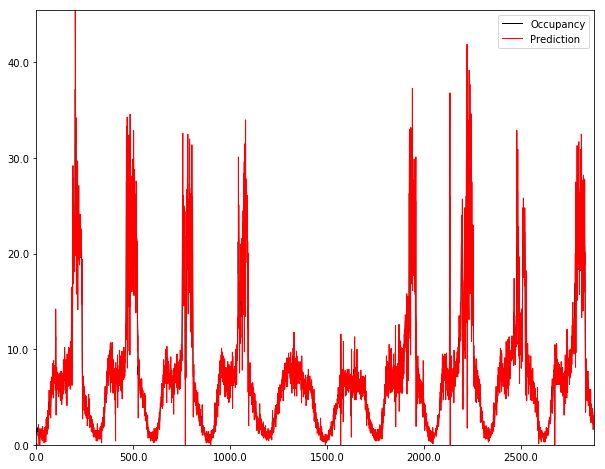

In [86]:
plot_time_series(X_400309[0], Y_400309[0], "Occupancy", "Prediction")

### Speed

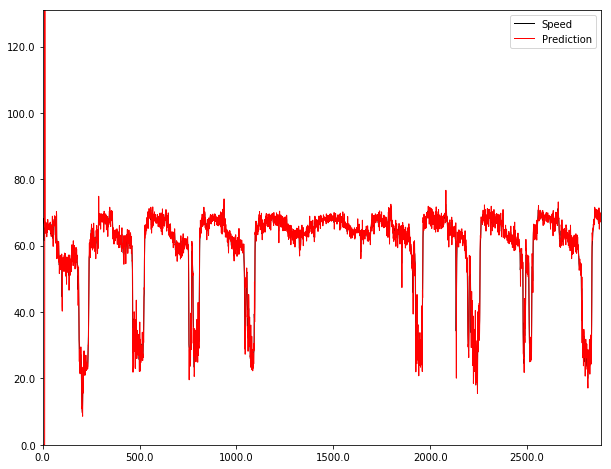

In [87]:
plot_time_series(X_400309[1], Y_400309[1], "Speed", "Prediction")

### Flow

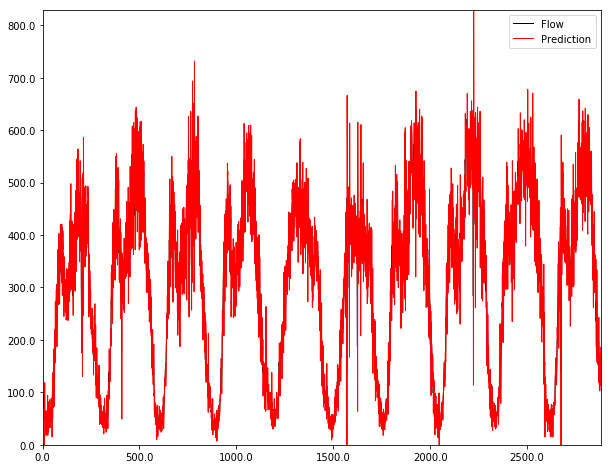

In [88]:
plot_time_series(X_400309[2], Y_400309[2], "Flow", "Prediction")

### Visualize All Traffic Variables

In [84]:
def visualize_all(X, Y):
    plot_time_series(X[0], Y[0], "Occupancy", "Prediction")
    plot_time_series(X[1], Y[1], "Speed", "Prediction")
    plot_time_series(X[2], Y[2], "Flow", "Prediction")

### Visualize Results Before

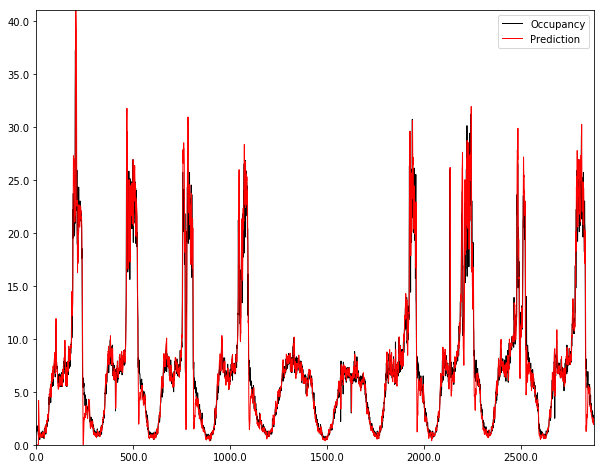

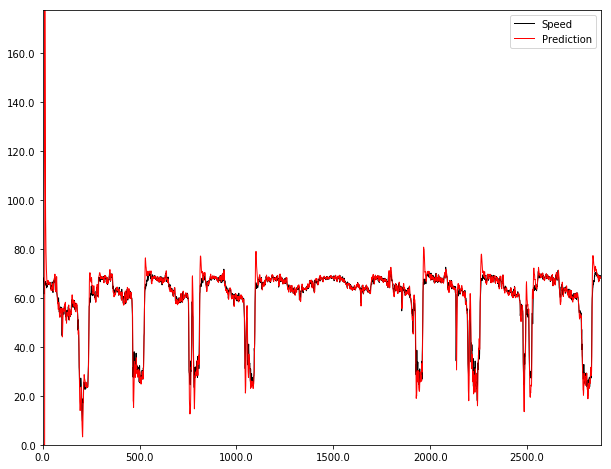

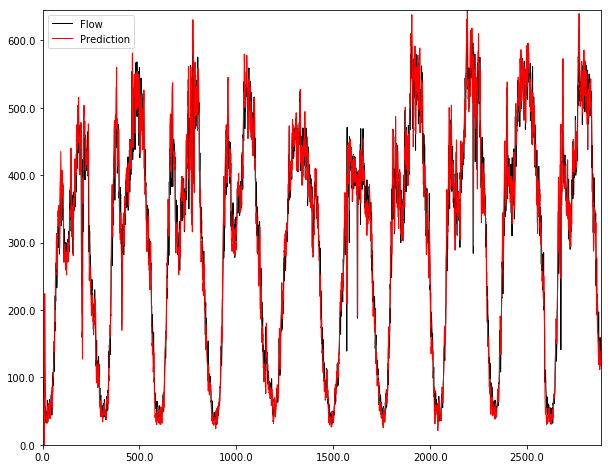

In [85]:
visualize_all(X_400309, best_Y_400309)

# Full-scale Data Preprocessing

In [91]:
occ_1

,Station ID,5 Minutes,Occupancy (%),# Lane Points,% Observed,Date,Time
0,408907,2017-01-01 00:00:00,2.1,3,0.0,2017-01-01,00:00:00
1,408907,2017-01-01 00:05:00,2.0,3,0.0,2017-01-01,00:05:00
2,408907,2017-01-01 00:10:00,2.0,3,0.0,2017-01-01,00:10:00
3,408907,2017-01-01 00:15:00,1.9,3,0.0,2017-01-01,00:15:00
4,408907,2017-01-01 00:20:00,1.8,3,0.0,2017-01-01,00:20:00
5,408907,2017-01-01 00:25:00,1.7,3,0.0,2017-01-01,00:25:00
6,408907,2017-01-01 00:30:00,1.5,3,0.0,2017-01-01,00:30:00
7,408907,2017-01-01 00:35:00,1.5,3,0.0,2017-01-01,00:35:00
8,408907,2017-01-01 00:40:00,1.5,3,0.0,2017-01-01,00:40:00
9,408907,2017-01-01 00:45:00,1.4,3,0.0,2017-01-01,00:45:00


In [92]:
flow_speed_1

,Station ID,5 Minutes,Flow (Veh/5 Minutes),Speed (mph),# Lane Points,% Observed,Date,Time
0,408907,2017-01-01 00:00:00,95.0,68.8,3,0.0,2017-01-01,00:00:00
1,408907,2017-01-01 00:05:00,91.0,68.4,3,0.0,2017-01-01,00:05:00
2,408907,2017-01-01 00:10:00,91.0,68.4,3,0.0,2017-01-01,00:10:00
3,408907,2017-01-01 00:15:00,86.0,68.5,3,0.0,2017-01-01,00:15:00
4,408907,2017-01-01 00:20:00,82.0,68.5,3,0.0,2017-01-01,00:20:00
5,408907,2017-01-01 00:25:00,79.0,68.4,3,0.0,2017-01-01,00:25:00
6,408907,2017-01-01 00:30:00,75.0,68.5,3,0.0,2017-01-01,00:30:00
7,408907,2017-01-01 00:35:00,72.0,68.3,3,0.0,2017-01-01,00:35:00
8,408907,2017-01-01 00:40:00,70.0,68.4,3,0.0,2017-01-01,00:40:00
9,408907,2017-01-01 00:45:00,68.0,68.3,3,0.0,2017-01-01,00:45:00


In [94]:
concatenated_1 = {}

In [96]:
concatenated_1["Station ID"] = occ_1["Station ID"].values
concatenated_1["Date"] = occ_1["Date"].values
concatenated_1["Time"] = occ_1["Time"].values
concatenated_1["Occupancy"] = occ_1["Occupancy (%)"].values
concatenated_1["Flow"] = flow_speed_1["Flow (Veh/5 Minutes)"].values
concatenated_1["Speed"] = flow_speed_1["Speed (mph)"].values

In [97]:
concatenated_1

{'Station ID': array([408907, 408907, 408907, ..., 400662, 400662, 400662]),
 'Date': array([datetime.date(2017, 1, 1), datetime.date(2017, 1, 1),
        datetime.date(2017, 1, 1), ..., datetime.date(2017, 12, 30),
        datetime.date(2017, 12, 30), datetime.date(2017, 12, 30)],
       dtype=object),
 'Time': array([datetime.time(0, 0), datetime.time(0, 5), datetime.time(0, 10),
        ..., datetime.time(23, 45), datetime.time(23, 50),
        datetime.time(23, 55)], dtype=object),
 'Occupancy': array([2.1, 2. , 2. , ..., 2.5, 2.8, 3.1]),
 'Flow': array([ 95.,  91.,  91., ..., 148., 168., 179.]),
 'Speed': array([68.8, 68.4, 68.4, ..., 69.6, 69.7, 69.4])}

In [98]:
concat = pd.DataFrame(concatenated_1)

In [99]:
concat

,Station ID,Date,Time,Occupancy,Flow,Speed
0,408907,2017-01-01,00:00:00,2.1,95.0,68.8
1,408907,2017-01-01,00:05:00,2.0,91.0,68.4
2,408907,2017-01-01,00:10:00,2.0,91.0,68.4
3,408907,2017-01-01,00:15:00,1.9,86.0,68.5
4,408907,2017-01-01,00:20:00,1.8,82.0,68.5
5,408907,2017-01-01,00:25:00,1.7,79.0,68.4
6,408907,2017-01-01,00:30:00,1.5,75.0,68.5
7,408907,2017-01-01,00:35:00,1.5,72.0,68.3
8,408907,2017-01-01,00:40:00,1.5,70.0,68.4
9,408907,2017-01-01,00:45:00,1.4,68.0,68.3


In [100]:
# Save the concatenated result as csv
concat.to_csv("data/I88N-processed/concat_1.csv")

Next, we want to choose 10 days for training. First, find the days when there are no accidents.

At this stage, we may want to preprocess the incident data such that it's easier to identify nearby detectors.

### Preprocess Incidents and Adding Upstream and Downstream Detectors

In [106]:
incidents["Start_Time"] = incidents["Start_Time"].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True))

In [109]:
incidents["Date"] = incidents["Start_Time"].dt.date
incidents["Time"] = incidents["Start_Time"].dt.time

In [110]:
incidents

,Incident_Id,Start_Time,Duration_(mins),Freeway,CA_PM,Abs_PM,Source,AREA,LOCATION,DESCRIPTION,Date,Time
0,16917059,2017-01-01 00:24:00,3,I880-N,0.4,0.4,CHP,San Jose,I880 N / I280 S I880 N Con,1183-Trfc Collision-Unkn Inj,2017-01-01,00:24:00
1,16917196,2017-01-01 02:14:00,14,I880-N,R34.773,45.0,CHP,Oakland,I880 N West Grand Ave Onr / I880 N I80 E Con,1183-Trfc Collision-Unkn Inj,2017-01-01,02:14:00
2,16917233,2017-01-01 02:44:00,6,I880-N,3.673,13.9,CHP,Hayward,I880 N / Nimitz Cvef Scale Ofr,1183-Trfc Collision-Unkn Inj,2017-01-01,02:44:00
3,16917332,2017-01-01 04:31:00,2,I880-N,20.473,30.7,CHP,Hayward,I880 N / Lewelling Blvd Onr,20002-Hit and Run No Injuries,2017-01-01,04:31:00
4,16917615,2017-01-01 09:25:00,12,I880-N,17.273,27.5,CHP,Hayward,I880 N / W Winton Ave Ofr,1125-Traffic Hazard,2017-01-01,09:25:00
5,16917677,2017-01-01 10:59:00,43,I880-N,8.573,18.8,CHP,Hayward,I880 N / Thornton Ave Ofr,1125-Traffic Hazard,2017-01-01,10:59:00
6,16917744,2017-01-01 11:52:00,9,I880-N,16.373,26.6,CHP,Hayward,I880 N / I880 N Sr92 Con,1125-Traffic Hazard,2017-01-01,11:52:00
7,16917873,2017-01-01 13:27:00,10,I880-N,25.673,35.9,CHP,Oakland,I880 N / Hegenberger Rd W Onr,1125A-Animal Hazard,2017-01-01,13:27:00
8,16918027,2017-01-01 16:11:00,3,I880-N,15.273,25.5,CHP,Hayward,I880 N / W Tennyson Rd Ofr,1125-Traffic Hazard,2017-01-01,16:11:00
9,16918100,2017-01-01 17:02:00,11,I880-N,12.773,23.0,CHP,Hayward,I880 N / Alvarado Niles Rd Ofr,1125-Traffic Hazard,2017-01-01,17:02:00


In [111]:
stations

,Fwy,District,County,City,CA PM,Abs PM,Length,ID,Name,Lanes,Type,Sensor Type,HOV,MS ID,IRM
0,I880-N,4,Santa Clara,NaN,0.31,0.310,0.425,408907,SB/NB 280 rm-n-fly/diag,3,Mainline,loops,No,DT596,L3-N-37-880-00031
1,I880-N,4,Santa Clara,NaN,0.54,0.540,0.510,400951,Stevens Creek Blvd,4,Mainline,loops,No,DT938,L4-N-37-880-00054
2,I880-N,4,Santa Clara,San Jose,1.33,1.330,0.750,400057,Bascom Ave rm-n-diag,3,Mainline,loops,No,DT960,L3-N-37-880-00133
3,I880-N,4,Santa Clara,San Jose,2.04,2.040,0.685,400147,The Alameda rm-n-loop,3,Mainline,loops,No,DT963,L3-N-37-880-00204
4,I880-N,4,Santa Clara,San Jose,2.7,2.700,0.735,400343,Coleman Ave rm-n-diag,3,Mainline,loops,No,DT082,L3-N-37-880-00270
5,I880-N,4,Santa Clara,San Jose,3.51,3.510,0.660,401560,1st St rm-n-loop,3,Mainline,loops,No,DT970,L3-N-37-880-00351
6,I880-N,4,Santa Clara,San Jose,4.02,4.020,0.350,400045,SB 101 rm-n-loop,4,Mainline,loops,No,DT974,L4-N-37-880-00402
7,I880-N,4,Santa Clara,San Jose,4.21,4.210,0.240,400122,NB 101 rm-n-diag,3,Mainline,loops,No,DT975,L3-N-37-880-00421
8,I880-N,4,Santa Clara,San Jose,4.5,4.500,0.645,401541,Gish Rd rm-n-diag,3,Mainline,loops,No,DT094,L3-N-37-880-00450
9,I880-N,4,Santa Clara,San Jose,5.5,5.500,0.750,402281,4A5324 loc 91,4,Mainline,magnetometers,No,DS703,N4-N-37-880-00550


It may be better for us to write a function first: given an Abs PM (in float 64 data type), return the upstream and downstream detector stations of that location.

In [122]:
def find_ups_downs(abs_pm, stations_abs_pm):
    num_stations = stations_abs_pm.size
    upstream = None
    downstream = None
    for i in range(num_stations):
        if stations_abs_pm[i] > abs_pm:
            downstream = i
            upstream = i - 1 if i >= 1 else None
            break
    if downstream == None:
        upstream = num_stations - 1
    return (upstream, downstream)

In [157]:
upstream = []
upstream_idx = []
downstream = []
downstream_idx = []
stations_abs_pm = stations["Abs PM"].values
for i, abs_pm in enumerate(incidents["Abs_PM"].values):
    ups, downs = find_ups_downs(abs_pm, stations_abs_pm)
    upstream.append(stations["ID"].values[ups])
    upstream_idx.append(ups)
    downstream.append(stations["ID"].values[downs] if downs is not None else None)
    downstream_idx.append(downs)

In [150]:
len(upstream), len(downstream)

(6722, 6722)

In [151]:
converted_incidents = {}
converted_incidents["ID"] = incidents["Incident_Id"].values
converted_incidents["Date"] = incidents["Date"].values
converted_incidents["Time"] = incidents["Time"].values
converted_incidents["Duration"] = incidents["Duration_(mins)"].values
converted_incidents["Upstream"] = upstream
converted_incidents["Upstream_Idx"] = upstream_idx
converted_incidents["Downstream"] = downstream
converted_incidents["Downstream_Idx"] = downstream_idx

In [152]:
concat_incidents = pd.DataFrame(converted_incidents)

In [153]:
concat_incidents.to_csv("data/I88N-processed/incidents.csv", index=False)

In [154]:
cleaned_concat_incidents = concat_incidents.loc[concat_incidents["Duration"] > 4]

Add duration to denote end time of the incident.

In [267]:
cleaned_concat_incidents["Duration"] = pd.to_timedelta(cleaned_concat_incidents["Duration"], unit='m')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
datetimes = []
for idx, row in cleaned_concat_incidents.iterrows():
    datetimes.append(datetime.datetime.combine(row["Date"], row["Time"]))
datetimes = np.array(datetimes)
cleaned_concat_incidents["Start DateTime"] = datetimes

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [277]:
cleaned_concat_incidents["End DateTime"] = pd.to_datetime(cleaned_concat_incidents["Start DateTime"] + cleaned_concat_incidents["Duration"])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [278]:
cleaned_concat_incidents

,ID,Date,Time,Duration,Upstream,Upstream_Idx,Downstream,Downstream_Idx,Start DateTime,End DateTime
1,16917196,2017-01-01,02:14:00,00:14:00,400765,97.0,400844.0,98.0,2017-01-01 02:14:00,2017-01-01 02:28:00
2,16917233,2017-01-01,02:44:00,00:06:00,400309,30.0,400417.0,31.0,2017-01-01 02:44:00,2017-01-01 02:50:00
4,16917615,2017-01-01,09:25:00,00:12:00,408134,61.0,400685.0,62.0,2017-01-01 09:25:00,2017-01-01 09:37:00
5,16917677,2017-01-01,10:59:00,00:43:00,401888,38.0,400137.0,39.0,2017-01-01 10:59:00,2017-01-01 11:42:00
6,16917744,2017-01-01,11:52:00,00:09:00,408135,57.0,417665.0,58.0,2017-01-01 11:52:00,2017-01-01 12:01:00
7,16917873,2017-01-01,13:27:00,00:10:00,400608,83.0,400949.0,84.0,2017-01-01 13:27:00,2017-01-01 13:37:00
9,16918100,2017-01-01,17:02:00,00:11:00,401613,48.0,400536.0,49.0,2017-01-01 17:02:00,2017-01-01 17:13:00
13,16919709,2017-01-02,17:56:00,00:08:00,400928,53.0,400284.0,54.0,2017-01-02 17:56:00,2017-01-02 18:04:00
17,16920394,2017-01-03,06:01:00,01:03:00,402828,23.0,407219.0,24.0,2017-01-03 06:01:00,2017-01-03 07:04:00
18,16920449,2017-01-03,06:42:00,00:11:00,402828,23.0,407219.0,24.0,2017-01-03 06:42:00,2017-01-03 06:53:00


In [279]:
cleaned_concat_incidents.to_csv("data/I88N-processed/cleaned_incidents.csv", index=False)

# Train parameters for two detector stations

Choose two adjacent stations, 400343 and 401560.

Next, we want to find the normal days when these two stations are unaffected.

In [147]:
days = cleaned_concat_incidents["Date"].unique()

In [148]:
days

array([datetime.date(2017, 1, 1), datetime.date(2017, 1, 2),
       datetime.date(2017, 1, 3), datetime.date(2017, 1, 4),
       datetime.date(2017, 1, 5), datetime.date(2017, 1, 6),
       datetime.date(2017, 1, 7), datetime.date(2017, 1, 8),
       datetime.date(2017, 1, 9), datetime.date(2017, 1, 10),
       datetime.date(2017, 1, 11), datetime.date(2017, 1, 12),
       datetime.date(2017, 1, 13), datetime.date(2017, 1, 14),
       datetime.date(2017, 1, 15), datetime.date(2017, 1, 16),
       datetime.date(2017, 1, 17), datetime.date(2017, 1, 18),
       datetime.date(2017, 1, 19), datetime.date(2017, 1, 20),
       datetime.date(2017, 1, 21), datetime.date(2017, 1, 22),
       datetime.date(2017, 1, 23), datetime.date(2017, 1, 24),
       datetime.date(2017, 1, 25), datetime.date(2017, 1, 26),
       datetime.date(2017, 1, 27), datetime.date(2017, 1, 28),
       datetime.date(2017, 1, 29), datetime.date(2017, 1, 30),
       datetime.date(2017, 1, 31), datetime.date(2017, 2, 1),
  

In [184]:
affected_days = []
for i, day in enumerate(days):
    # for each day, check if there are accidents affecting two stations
    # for now, consider only as they are the immediate downstream stations
    incidents_i = concat_incidents.loc[concat_incidents["Date"] == day]
    if 400343 in incidents_i["Upstream"].values or 401560 in incidents_i["Upstream"]:
        affected_days.append(day)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


In [185]:
affected_days

[datetime.date(2017, 1, 13),
 datetime.date(2017, 1, 22),
 datetime.date(2017, 1, 23),
 datetime.date(2017, 1, 24),
 datetime.date(2017, 1, 25),
 datetime.date(2017, 1, 26),
 datetime.date(2017, 2, 5),
 datetime.date(2017, 2, 8),
 datetime.date(2017, 2, 10),
 datetime.date(2017, 2, 14),
 datetime.date(2017, 2, 15),
 datetime.date(2017, 2, 16),
 datetime.date(2017, 2, 17),
 datetime.date(2017, 3, 1),
 datetime.date(2017, 3, 11),
 datetime.date(2017, 3, 12),
 datetime.date(2017, 3, 18),
 datetime.date(2017, 3, 24),
 datetime.date(2017, 3, 25),
 datetime.date(2017, 3, 26),
 datetime.date(2017, 3, 28),
 datetime.date(2017, 3, 29),
 datetime.date(2017, 3, 31),
 datetime.date(2017, 4, 5),
 datetime.date(2017, 4, 12),
 datetime.date(2017, 4, 14),
 datetime.date(2017, 5, 6),
 datetime.date(2017, 5, 13),
 datetime.date(2017, 5, 29),
 datetime.date(2017, 5, 31),
 datetime.date(2017, 6, 16),
 datetime.date(2017, 6, 17),
 datetime.date(2017, 6, 27),
 datetime.date(2017, 6, 28),
 datetime.date(2017

In [186]:
unaffected_days = [day for day in days if day not in affected_days]

In [187]:
unaffected_days

[datetime.date(2017, 1, 1),
 datetime.date(2017, 1, 2),
 datetime.date(2017, 1, 3),
 datetime.date(2017, 1, 4),
 datetime.date(2017, 1, 5),
 datetime.date(2017, 1, 6),
 datetime.date(2017, 1, 7),
 datetime.date(2017, 1, 8),
 datetime.date(2017, 1, 9),
 datetime.date(2017, 1, 10),
 datetime.date(2017, 1, 11),
 datetime.date(2017, 1, 12),
 datetime.date(2017, 1, 14),
 datetime.date(2017, 1, 15),
 datetime.date(2017, 1, 16),
 datetime.date(2017, 1, 17),
 datetime.date(2017, 1, 18),
 datetime.date(2017, 1, 19),
 datetime.date(2017, 1, 20),
 datetime.date(2017, 1, 21),
 datetime.date(2017, 1, 27),
 datetime.date(2017, 1, 28),
 datetime.date(2017, 1, 29),
 datetime.date(2017, 1, 30),
 datetime.date(2017, 1, 31),
 datetime.date(2017, 2, 1),
 datetime.date(2017, 2, 2),
 datetime.date(2017, 2, 3),
 datetime.date(2017, 2, 4),
 datetime.date(2017, 2, 6),
 datetime.date(2017, 2, 7),
 datetime.date(2017, 2, 9),
 datetime.date(2017, 2, 11),
 datetime.date(2017, 2, 12),
 datetime.date(2017, 2, 13),
 

Choose 10 days for training: 2017.9.1 - 2017.9.10.  Then we need the traffic data during this time period for the two stations.

In [195]:
import datetime
train_date = [day for day in unaffected_days if (day >= datetime.date(2017, 9, 1) and day <= datetime.date(2017, 9, 10))]

In [196]:
train_date

[datetime.date(2017, 9, 1),
 datetime.date(2017, 9, 2),
 datetime.date(2017, 9, 3),
 datetime.date(2017, 9, 4),
 datetime.date(2017, 9, 5),
 datetime.date(2017, 9, 7),
 datetime.date(2017, 9, 8),
 datetime.date(2017, 9, 9),
 datetime.date(2017, 9, 10)]

In [204]:
train_df = concat.loc[concat["Station ID"].isin([400343, 401560]) & concat["Date"].isin(train_date)]

In [206]:
train_df_400343 = train_df.loc[train_df["Station ID"] == 400343]
train_df_401560 = train_df.loc[train_df["Station ID"] == 401560]

In [207]:
# Stack the variables together
num_timestamp_400343 = train_df_400343["Date"].values.size
X_400343 = np.ndarray((3, num_timestamp_400343))
num_timestamp_401560 = train_df_400343["Date"].values.size
X_401560 = np.ndarray((3, num_timestamp_401560))

In [208]:
feature_list = ["Occupancy", "Speed", "Flow"]

In [209]:
for i, feature in enumerate(feature_list):
    X_400343[i, :] = train_df_400343[feature].values
    X_401560[i, :] = train_df_401560[feature].values

In [214]:
X_400343

array([[  1.7,   2. ,   1.7, ...,   2.1,   1.6,   1.9],
       [ 65.4,  64.8,  64.8, ...,  65.2,  64.4,  64.9],
       [ 77. ,  98. ,  84. , ..., 102. ,  75. ,  95. ]])

In [215]:
X_401560

array([[  1.8,   2.2,   2.1, ...,   2.7,   2.4,   2.6],
       [ 63.3,  63.5,  63.4, ...,  63.6,  63.6,  63.7],
       [ 78. , 109. , 101. , ..., 119. , 100. , 119. ]])

Let's wrap up the previous training code into a function.

In [189]:
import copy

In [352]:
def TSA_train(X):
    """
        X: feature matrix saving traffic variables across time, for each time, there are three variables - 
           speed, flow and occupancy
           dimension: n * m, where n = number of variables, m = number of data points
           
        return: best snapshot, and best alpha vector
    """
    RMSEs = np.zeros((3, 1000))
    alphas = np.array(range(1000)) * 0.001
    num_timestamp = X[0].size
    num_var = X[:, 0].size
    min_idx = [-1, -1, -1]
    best_S1 = np.zeros(num_timestamp)
    best_S2 = np.zeros(num_timestamp)
    best_Y = np.zeros((num_var, num_timestamp))
    best_alpha = np.zeros(num_var)
    
    for i in range(num_var):
        min_rmse_i = 1000
        print("Variable " + str(i) + ":")
        for j, alpha in enumerate(alphas):
            S1_j = np.zeros(num_timestamp)
            S2_j = np.zeros(num_timestamp)
            Y_j = np.zeros(num_timestamp)
            S1_j[9] = np.mean(X[i, 0:9])
            for k in range(5):
                S2_j[9] += (X[i, 2 * k + 1] - X[i, 2 * j])
            S2_j[9] /= 5.
            
            for t in range(num_timestamp - 1):
                if t > 9:
                    S1_j[t] = S1(X[i, t], S1_j[t-1], alpha)
                    S2_j[t] = S2(S1_j[t], S2_j[t-1], alpha)
                    Y_j[t+1] = A(S1_j[t], S2_j[t]) + B(S1_j[t], S2_j[t], alpha)
            
            # Compute RMSE for j-th alpha
            RMSEs[i, j] = RMSE(X[i, 10:], Y_j[10:])
            print(str(alpha) + ": " + str(RMSEs[i, j]))
            if min_rmse_i > RMSEs[i, j]:
                min_rmse_i = RMSEs[i, j]
                min_idx[i] = j
                best_S1 = S1_j
                best_S2 = S2_j
                best_Y[i, :] = copy.deepcopy(Y_j)
                best_alpha[i] = alpha
    
    return best_alpha, best_S1, best_S2, best_Y

In [353]:
best_alpha_400343, best_S1_400343, best_S2_400343, best_Y_400343 = TSA_train(X_400343)

Variable 0:
0.0: 4.909488197177909
0.001: 5.2767775187810555
0.002: 4.9722661969331785
0.003: 4.79384408552861
0.004: 4.682065671631989
0.005: 4.625036756019604
0.006: 4.549809373814659
0.007: 4.491375996867486
0.008: 4.4310285808295955
0.009000000000000001: 4.376223735229303
0.01: 4.321040778938979
0.011: 4.2609185174838125
0.012: 4.201244520404964
0.013000000000000001: 4.143650545457987
0.014: 4.087968148884647
0.015: 4.028053090291712
0.016: 3.973308547636691
0.017: 3.9180296919201694
0.018000000000000002: 3.862569911530336
0.019: 3.81074996877505
0.02: 3.757856227787203
0.021: 3.7098069887526433
0.022: 3.6620693142369496
0.023: 3.6132374388775212
0.024: 3.568337853133319
0.025: 3.5262826179984783
0.026000000000000002: 3.484393372137412
0.027: 3.450746704763862
0.028: 3.4159138905897444
0.029: 3.3806605549245634
0.03: 3.329157345177299
0.031: 3.3120432341676227
0.032: 3.27842691484644
0.033: 3.2649379244019725
0.034: 3.2829844414167897
0.035: 3.241174565677756
0.036000000000000004: 

0.303: 1.464005914573816
0.304: 1.4633163677325374
0.305: 1.4622898371933741
0.306: 1.4611323756316366
0.307: 1.4605080080713606
0.308: 1.459631505453549
0.309: 1.4587644976427423
0.31: 1.457804481067504
0.311: 1.4568706920876244
0.312: 1.4559628902984207
0.313: 1.4552883128963896
0.314: 1.4544678640246702
0.315: 1.453874036680275
0.316: 1.4528538989803457
0.317: 1.452276459829725
0.318: 1.4513751577794094
0.319: 1.450598632602666
0.32: 1.45022297849529
0.321: 1.4493163186505318
0.322: 1.4488715049519179
0.323: 1.4483036270427863
0.324: 1.4472311331060663
0.325: 1.4472359684413083
0.326: 1.4467357527872682
0.327: 1.4460219309938491
0.328: 1.4469558875778068
0.329: 1.446252961730666
0.33: 1.4446747912425817
0.331: 1.445194658684867
0.332: 1.4441916017230385
0.333: 1.444530411143527
0.334: 1.445005313804595
0.335: 1.4480320789969479
0.336: 1.4440949624216723
0.337: 1.4457008188221727
0.338: 1.4471146468796972
0.339: 1.4454097650931312
0.34: 1.446938785800692
0.341: 1.453428239496977
0.34

0.605: 1.4266031477752392
0.606: 1.426353876016501
0.607: 1.4276165108875511
0.608: 1.4295493628017695
0.609: 1.431814731300702
0.61: 1.4351251783385173
0.611: 1.4389738212174423
0.612: 1.4346603809558198
0.613: 1.4367576781241083
0.614: 1.441588529246517
0.615: 1.4427877976793257
0.616: 1.4496139253070062
0.617: 1.4613992629810244
0.618: 1.4518253218505113
0.619: 1.4538128836332653
0.62: 1.464166530674378
0.621: 1.4867216382148325
0.622: 1.4827156414850073
0.623: 1.488837063812382
0.624: 1.4831374076374308
0.625: 1.5146187106103608
0.626: 1.5373052081240726
0.627: 1.552513484584478
0.628: 1.5130370080949254
0.629: 1.5182431575408444
0.63: 1.5133443404947764
0.631: 1.5095789468583645
0.632: 1.497655936072585
0.633: 1.5239718326111726
0.634: 1.4962949387088675
0.635: 1.5000508807753494
0.636: 1.484276377433845
0.637: 1.4585073815031713
0.638: 1.4561628042328423
0.639: 1.4530337768101127
0.64: 1.4448777672882183
0.641: 1.4541718727553403
0.642: 1.456952767374168
0.643: 1.4539110150572467

0.917: 1.6172848167405318
0.918: 1.616369358812336
0.919: 1.6188466633137206
0.92: 1.6188126371445415
0.921: 1.6198740368221545
0.922: 1.620412294321938
0.923: 1.6233673876481491
0.924: 1.624253561681861
0.925: 1.6261994984616273
0.926: 1.6260318637685196
0.927: 1.6284187342847511
0.928: 1.6280218991467903
0.929: 1.6349899928336895
0.93: 1.629815050875454
0.931: 1.6315538704750419
0.932: 1.6352552111484608
0.933: 1.6354099742834025
0.934: 1.6375521787208602
0.935: 1.638706217349726
0.936: 1.6367236588953393
0.937: 1.6383094286191144
0.9380000000000001: 1.6404041229868065
0.9390000000000001: 1.640358170737254
0.9400000000000001: 1.6415027323491433
0.9410000000000001: 1.6424155511997698
0.9420000000000001: 1.6424202680656177
0.9430000000000001: 1.6464615226611574
0.9440000000000001: 1.646863429777345
0.9450000000000001: 1.6463201508542882
0.9460000000000001: 1.6467804621395987
0.9470000000000001: 1.661228277209329
0.9480000000000001: 1.6593402296234512
0.9490000000000001: 1.6592489200045

0.22: 4.618311809146045
0.221: 4.597978189944986
0.222: 4.5874835454329155
0.223: 4.596440671101068
0.224: 4.561882365143239
0.225: 4.580523043536823
0.226: 4.560623495876007
0.227: 4.536066997334709
0.228: 4.530764918680749
0.229: 4.501707800959195
0.23: 4.477591836068401
0.231: 4.500893568950836
0.232: 4.486343739220116
0.233: 4.471886039054141
0.234: 4.462212971041855
0.23500000000000001: 4.438567482656343
0.23600000000000002: 4.4197371541875174
0.23700000000000002: 4.424258583706489
0.23800000000000002: 4.3963171021645895
0.23900000000000002: 4.391644456497027
0.24: 4.410093095049719
0.241: 4.4054462670518655
0.242: 4.364085720127395
0.243: 4.350444402712739
0.244: 4.359693682683934
0.245: 4.341594616173211
0.246: 4.35995952401026
0.247: 4.328352740358549
0.248: 4.30599473909254
0.249: 4.324308793255587
0.25: 4.30656831825377
0.251: 4.262092957739095
0.252: 4.311694892168343
0.253: 4.285197490240127
0.254: 4.285592183224771
0.255: 4.259329871621163
0.256: 4.259794925125232
0.257: 4

0.528: 2.5443160604504884
0.529: 2.542563217301175
0.53: 2.521820744367172
0.531: 2.5327317367927384
0.532: 2.5565142018112503
0.533: 2.604699843053896
0.534: 2.607258856112028
0.535: 2.614238192680117
0.536: 2.4870491239195816
0.537: 2.455299108193344
0.538: 2.447820014390457
0.539: 2.476166799183626
0.54: 2.4745847586641663
0.541: 2.543038282649381
0.542: 2.575395874574098
0.543: 2.558678169574088
0.544: 2.4485140893274826
0.545: 2.468768965221284
0.546: 2.538792103850638
0.547: 2.792432125266195
0.548: 2.90639067079786
0.549: 2.926297681377121
0.55: 2.9462857503026756
0.551: 2.9290226438440508
0.552: 2.934097098720546
0.553: 2.949095110815812
0.554: 2.9392898031287418
0.555: 2.9295339654124564
0.556: 2.9272034999991012
0.557: 2.942125102780314
0.558: 2.9620417453594077
0.559: 2.9745616835410864
0.56: 2.982117807342689
0.561: 2.987184121909071
0.562: 2.9773295133498214
0.5630000000000001: 2.9675230801335277
0.5640000000000001: 2.9651616994781222
0.5650000000000001: 2.965273260088839


0.844: 2.50828734529969
0.845: 2.495445073478993
0.846: 2.5127773763418237
0.847: 2.528729210031424
0.848: 2.5325043662846456
0.849: 2.5408848637032717
0.85: 2.5232635689879452
0.851: 2.53311626772794
0.852: 2.530783102385031
0.853: 2.556011433282647
0.854: 2.5231224233933025
0.855: 2.5208282400717583
0.856: 2.538205004297745
0.857: 2.5603337548923655
0.858: 2.526014132994224
0.859: 2.554055336592111
0.86: 2.5169648442641757
0.861: 2.514712079050498
0.862: 2.521412640934866
0.863: 2.519156351233975
0.864: 2.509493874184586
0.865: 2.5146742650458163
0.866: 2.516891261371138
0.867: 2.516143441564283
0.868: 2.5497543605747124
0.869: 2.508768318089963
0.87: 2.5511693700934526
0.871: 2.5087835661076556
0.872: 2.496397909028657
0.873: 2.4956994862478568
0.874: 2.505169669451093
0.875: 2.50446058188616
0.876: 2.5037550279397602
0.877: 2.5001568566253587
0.878: 2.4965778734151294
0.879: 2.5045511254799058
0.88: 2.4937758980506004
0.881: 2.49740405223495
0.882: 2.501033157497366
0.883: 2.506103

0.157: 35.3052994225404
0.158: 35.16405987052359
0.159: 35.065670690963756
0.16: 35.039814698489636
0.161: 34.97242690697991
0.162: 34.89855471822305
0.163: 34.76212084204744
0.164: 34.79467064994001
0.165: 34.608564266380746
0.166: 34.546045608771074
0.167: 34.47234986690338
0.168: 34.382884413558095
0.169: 34.34066585844422
0.17: 34.41465651878672
0.171: 34.35949359369383
0.17200000000000001: 34.31425145086437
0.17300000000000001: 34.357644330110396
0.17400000000000002: 34.22796807762279
0.17500000000000002: 34.114733009433216
0.176: 34.39290752808449
0.177: 34.24913409763229
0.178: 34.7876142739494
0.179: 34.694866209528875
0.18: 34.10146781321688
0.181: 34.467501064465566
0.182: 34.67303719036804
0.183: 34.45017959185958
0.184: 35.04559371892283
0.185: 35.11087424532644
0.186: 34.93282489451613
0.187: 35.68560233067281
0.188: 35.04739075532228
0.189: 36.113966724840736
0.19: 36.47843509241787
0.191: 35.34406679696
0.192: 35.57066102529686
0.193: 35.73519784366856
0.194: 36.06133005

0.484: 35.04325488615326
0.485: 34.40670150706127
0.486: 35.06371433709269
0.487: 34.639386595022536
0.488: 34.993819262144484
0.489: 35.25565120070913
0.49: 35.090052035182275
0.491: 35.416181444543895
0.492: 34.90353224374566
0.493: 34.79172927043195
0.494: 34.53066600391927
0.495: 34.81415242523881
0.496: 34.17372350573163
0.497: 34.738072704577455
0.498: 35.10118701521626
0.499: 34.38365774453164
0.5: 34.507572429000064
0.501: 34.486592968271715
0.502: 34.58497324793894
0.503: 35.0190413337787
0.504: 34.336436315116536
0.505: 34.38066444180485
0.506: 33.9868587756732
0.507: 34.952148987012706
0.508: 34.43746139970273
0.509: 34.703402366510275
0.51: 34.55217166809213
0.511: 34.999433020695975
0.512: 35.10207933908905
0.513: 34.71326229784414
0.514: 35.02840471008848
0.515: 34.47056026255099
0.516: 34.79677404024301
0.517: 34.815891065895975
0.518: 34.87464245886866
0.519: 35.19249712165885
0.52: 34.78211760099627
0.521: 35.49980647428599
0.522: 34.101799774743576
0.523: 33.396639117

0.802: 38.12934361574571
0.803: 37.99783048149037
0.804: 37.868454841736806
0.805: 37.93736423543969
0.806: 37.85122396132958
0.807: 38.47287369139506
0.808: 38.34678493994878
0.809: 38.830321702801676
0.81: 38.78798284333108
0.811: 38.901029147386765
0.812: 38.6076493535106
0.8130000000000001: 38.17952185855373
0.8140000000000001: 38.12549899532031
0.8150000000000001: 38.32636946344269
0.8160000000000001: 38.37853170430786
0.8170000000000001: 38.501230325574404
0.8180000000000001: 38.54161576909227
0.8190000000000001: 39.34642659349028
0.8200000000000001: 38.84919237685387
0.8210000000000001: 38.84206112158543
0.8220000000000001: 39.04615080431014
0.8230000000000001: 39.072363557390595
0.8240000000000001: 39.04545219444584
0.8250000000000001: 38.84507146700807
0.8260000000000001: 38.89761456829223
0.8270000000000001: 38.994032748288646
0.8280000000000001: 39.221786844370996
0.8290000000000001: 39.15381260598848
0.8300000000000001: 39.35395733019319
0.8310000000000001: 39.3434003946242

In [354]:
best_alpha_401560, best_S1_401560, best_S2_401560, best_Y_401560 = TSA_train(X_401560)

Variable 0:
0.0: 2.102878672585473
0.001: 2.584850476588673
0.002: 2.099442396733852
0.003: 2.017601042951477
0.004: 1.7531093619863134
0.005: 1.7681973662557122
0.006: 1.6617594308478638
0.007: 1.6634007295140434
0.008: 1.5862703492750199
0.009000000000000001: 1.575478927655817
0.01: 1.5746296907381985
0.011: 1.510232100474729
0.012: 1.4903899434974714
0.013000000000000001: 1.4564365274382003
0.014: 1.4366192371331024
0.015: 1.3985426328089314
0.016: 1.3788650176807637
0.017: 1.353913091601421
0.018000000000000002: 1.324424893072817
0.019: 1.3056027127417031
0.02: 1.282317633325811
0.021: 1.2645267568419698
0.022: 1.2331894837769783
0.023: 1.2162504555334037
0.024: 1.200025764950689
0.025: 1.1894497568808011
0.026000000000000002: 1.1649175221956962
0.027: 1.1780413931327542
0.028: 1.1476522793680954
0.029: 1.1296061081823403
0.03: 1.1121999831753353
0.031: 1.1062319999888093
0.032: 1.1013632884680933
0.033: 1.0975328285554968
0.034: 1.129829135734734
0.035: 1.1215077750515619
0.036000

0.303: 0.5374472556583372
0.304: 0.5499781623049849
0.305: 0.5371045333217275
0.306: 0.54613642930713
0.307: 0.5371489781429785
0.308: 0.537293122642031
0.309: 0.5374387505323174
0.31: 0.5375858489402138
0.311: 0.537734405183117
0.312: 0.537884406765976
0.313: 0.5380358413779001
0.314: 0.5381886968888363
0.315: 0.5383429613463202
0.316: 0.5387277995690803
0.317: 0.5388839546513879
0.318: 0.5388140914708777
0.319: 0.5392003912930715
0.32: 0.5396286068080939
0.321: 0.5400981722897087
0.322: 0.5406085202174621
0.323: 0.5407691976942651
0.324: 0.5405842796456193
0.325: 0.541094544480859
0.326: 0.541644546615961
0.327: 0.5426992124726151
0.328: 0.5439102787252302
0.329: 0.5440698395690371
0.33: 0.5436903563828264
0.331: 0.5443929204269623
0.332: 0.5451322786164714
0.333: 0.5459078739248232
0.334: 0.5474078560404918
0.335: 0.548290279880797
0.336: 0.5484465257169119
0.337: 0.5493615190959336
0.338: 0.5511401969806674
0.339: 0.5530576636838881
0.34: 0.5561196087345655
0.341: 0.558374170806486

0.608: 0.6263848439590259
0.609: 0.6296889986973548
0.61: 0.6323013365163037
0.611: 0.6332410005913117
0.612: 0.631257528527052
0.613: 0.6305343522135458
0.614: 0.6348603928866673
0.615: 0.6345831751225408
0.616: 0.6402137296222702
0.617: 0.6435238467152803
0.618: 0.6423205085682566
0.619: 0.6433901210561922
0.62: 0.6519575260945066
0.621: 0.6618412855526079
0.622: 0.658127632326057
0.623: 0.6528475907968553
0.624: 0.6514043970744369
0.625: 0.6534446356901668
0.626: 0.6495168133038667
0.627: 0.6459552127905585
0.628: 0.6517826948982686
0.629: 0.6458740261953874
0.63: 0.6499736722938041
0.631: 0.6472535276065507
0.632: 0.6498308216496191
0.633: 0.6471856942433729
0.634: 0.6482341086313642
0.635: 0.6523503317613161
0.636: 0.6503615890945214
0.637: 0.6471227870824369
0.638: 0.6448610928156591
0.639: 0.6477953424820138
0.64: 0.6420882482881467
0.641: 0.6478059931026406
0.642: 0.6488088621822596
0.643: 0.6491479485221399
0.644: 0.6501599531675281
0.645: 0.6491709807648703
0.646: 0.649513765

0.916: 0.7613410662110625
0.917: 0.7623803197476157
0.918: 0.7621093949312078
0.919: 0.7636735010057617
0.92: 0.7641839212428551
0.921: 0.764694992943063
0.922: 0.7652067172017833
0.923: 0.7662784689737566
0.924: 0.7662321278107134
0.925: 0.7684927852313309
0.926: 0.7686958720355679
0.927: 0.77014344651008
0.928: 0.76802458661908
0.929: 0.7746810625911659
0.93: 0.7701570736567523
0.931: 0.7715606480181414
0.932: 0.7733442173176037
0.933: 0.7748712034757815
0.934: 0.776086960262397
0.935: 0.7758896669930854
0.936: 0.7750685816964414
0.937: 0.7749566790271942
0.9380000000000001: 0.7760983728083903
0.9390000000000001: 0.775991220954186
0.9400000000000001: 0.7768171214291557
0.9410000000000001: 0.777967376305608
0.9420000000000001: 0.7772484261527212
0.9430000000000001: 0.7783736765193078
0.9440000000000001: 0.7798436029979237
0.9450000000000001: 0.7791113749111955
0.9460000000000001: 0.780560099465424
0.9470000000000001: 0.7820592137818456
0.9480000000000001: 0.7822466006569165
0.94900000

0.222: 4.035291041056586
0.223: 4.032034511661068
0.224: 4.017899572928126
0.225: 4.009293281921693
0.226: 3.989904718635008
0.227: 3.981446192151567
0.228: 3.98921587923607
0.229: 3.9700742086962633
0.23: 3.9671303846245625
0.231: 3.9642131494891037
0.232: 3.955989950419635
0.233: 3.9318766072629883
0.234: 3.9344052752082743
0.23500000000000001: 3.926358674279858
0.23600000000000002: 3.913094102794324
0.23700000000000002: 3.899912060276896
0.23800000000000002: 3.9025330724830267
0.23900000000000002: 3.884240794145835
0.24: 3.8921199425776476
0.241: 3.8687711530324904
0.242: 3.8507476690071956
0.243: 3.863838828702282
0.244: 3.8459357358820134
0.245: 3.853848243883149
0.246: 3.830952345185198
0.247: 3.82353126475672
0.248: 3.83146073635562
0.249: 3.824091276602278
0.25: 3.816767567398926
0.251: 3.7943068159738087
0.252: 3.79720694413983
0.253: 3.7900311031250657
0.254: 3.7728587258852246
0.255: 3.7758107086187516
0.256: 3.7737611511680313
0.257: 3.761762542734431
0.258: 3.7647429913038

0.529: 2.724204320789009
0.53: 2.73056747221816
0.531: 2.7142246420433427
0.532: 2.71208834348819
0.533: 2.707138879611716
0.534: 2.6965848172080773
0.535: 2.6804832387530517
0.536: 2.6700495245213034
0.537: 2.665226198525269
0.538: 2.6743151859036542
0.539: 2.6806130377460016
0.54: 2.6813411011921673
0.541: 2.668209278008694
0.542: 2.6744834479306423
0.543: 2.686286172177559
0.544: 2.6731897475824518
0.545: 2.6739241078686553
0.546: 2.674657010476295
0.547: 2.6808899904347983
0.548: 2.676118443426486
0.549: 2.6741051125868713
0.55: 2.6693629009399316
0.551: 2.6728306855430177
0.552: 2.6626546113125014
0.553: 2.6715650743809407
0.554: 2.6641379541674515
0.555: 2.6567424115393545
0.556: 2.652080778417638
0.557: 2.655534068555192
0.558: 2.6589808923717326
0.559: 2.6570282941535335
0.56: 2.6604656501436086
0.561: 2.658516447117687
0.562: 2.651208817518538
0.5630000000000001: 2.651958656595201
0.5640000000000001: 2.6500331506866823
0.5650000000000001: 2.642780089743273
0.5660000000000001: 

0.8320000000000001: 2.3063313448800256
0.833: 2.3054875918393667
0.834: 2.2911203886349214
0.835: 2.2802370293172154
0.836: 2.2761024981331373
0.837: 2.278648088483297
0.838: 2.276193078017866
0.839: 2.273747759284198
0.84: 2.274625272002669
0.841: 2.2738452083731655
0.842: 2.271416053485485
0.843: 2.270643909487789
0.844: 2.2715203052397723
0.845: 2.269107223859599
0.846: 2.2798553256641316
0.847: 2.2906359179728413
0.848: 2.2898371141698384
0.849: 2.2873905387750075
0.85: 2.28495352238099
0.851: 2.2891022024435688
0.852: 2.283385010830903
0.853: 2.272807373149766
0.854: 2.2785608720185815
0.855: 2.277791036082234
0.856: 2.2753984775924394
0.857: 2.35403964094486
0.858: 2.2852439517973866
0.859: 2.350576609282142
0.86: 2.2739794043988466
0.861: 2.2732245498851653
0.862: 2.2740822350129553
0.863: 2.2733295841475707
0.864: 2.269371654532185
0.865: 2.2718316920935773
0.866: 2.2726869229780267
0.867: 2.273540528250118
0.868: 2.3377513293848917
0.869: 2.2704576990310232
0.87: 2.33440416698

0.137: 41.88912728109263
0.138: 42.172329179561494
0.139: 42.90984058573089
0.14: 41.976130475308175
0.14100000000000001: 40.949712525375666
0.14200000000000002: 42.71497950440078
0.14300000000000002: 41.071447740366374
0.14400000000000002: 40.731225235912135
0.145: 40.23753166520206
0.146: 40.25629169140147
0.147: 39.923878199401734
0.148: 39.56407257194168
0.149: 38.94887406731933
0.15: 38.6331264672784
0.151: 38.956826849844134
0.152: 38.6272494416095
0.153: 38.47906564560823
0.154: 38.74728108922037
0.155: 38.57612084601702
0.156: 38.483402459169255
0.157: 38.38406054739187
0.158: 38.14751450908141
0.159: 38.096916265442815
0.16: 38.20201784401245
0.161: 38.141309670469646
0.162: 38.03205692288239
0.163: 37.96130991192935
0.164: 38.05672062972296
0.165: 37.884248024195465
0.166: 37.818800764705955
0.167: 37.68121111203283
0.168: 37.65552133386391
0.169: 37.66295413517642
0.17: 37.81831218205586
0.171: 37.741940855816175
0.17200000000000001: 37.66982060940125
0.17300000000000001: 37

0.447: 38.96452356737421
0.448: 38.99165482802009
0.449: 39.02941076457669
0.45: 39.01360272428552
0.451: 39.0586328487474
0.452: 39.06186776198868
0.453: 39.09771040849139
0.454: 39.13299036128759
0.455: 39.19107210413119
0.456: 39.143525498909696
0.457: 39.205177107297644
0.458: 39.24982283740809
0.459: 39.34072904421256
0.46: 39.446337674642386
0.461: 39.37285264162357
0.462: 39.57795064414752
0.463: 39.562930691014
0.464: 39.73434330297566
0.465: 39.596749528579714
0.466: 40.043420938596185
0.467: 40.39274510897562
0.468: 40.10113119286127
0.46900000000000003: 40.42686584455413
0.47000000000000003: 40.951963267111516
0.47100000000000003: 40.43589970320761
0.47200000000000003: 41.64086477174268
0.47300000000000003: 41.76398403504585
0.47400000000000003: 41.1813415485476
0.47500000000000003: 40.4085772230596
0.47600000000000003: 40.79492003181529
0.47700000000000004: 42.955141204441745
0.47800000000000004: 43.475215861100274
0.47900000000000004: 42.080388237698266
0.48: 41.5120761997

0.756: 47.20864560402555
0.757: 47.328889296751264
0.758: 47.43252382300974
0.759: 47.525468498298814
0.76: 47.69616589553434
0.761: 47.906838756865916
0.762: 47.96159610718635
0.763: 48.05821400875414
0.764: 48.5579683849963
0.765: 48.34886307779052
0.766: 48.63333712856978
0.767: 48.25544941651831
0.768: 48.53548034702803
0.769: 48.17394887173738
0.77: 48.60487746921005
0.771: 47.96841468704305
0.772: 48.21935834197292
0.773: 48.50792496326076
0.774: 48.46168419714045
0.775: 48.428802002988064
0.776: 48.489607433207524
0.777: 48.48858510785005
0.778: 48.358071316887674
0.779: 48.57924365083066
0.78: 48.225322442222634
0.781: 48.482069706299626
0.782: 48.62382707297638
0.783: 48.25699979099392
0.784: 48.48324757977979
0.785: 48.540615177296495
0.786: 48.37753361102365
0.787: 48.624685969388594
0.788: 48.60702394238978
0.789: 48.63808181451329
0.79: 48.75816374723014
0.791: 48.57721181275494
0.792: 48.8803815045461
0.793: 48.7499862091635
0.794: 49.07383175788341
0.795: 49.044850737809

In [234]:
best_alpha_400343

array([0.456, 0.807, 0.312])

In [355]:
best_S1_400343

array([  0.        ,   0.        ,   0.        , ..., 106.20916788,
        96.4719075 ,   0.        ])

In [235]:
best_alpha_401560

array([0.305, 0.996, 0.305])

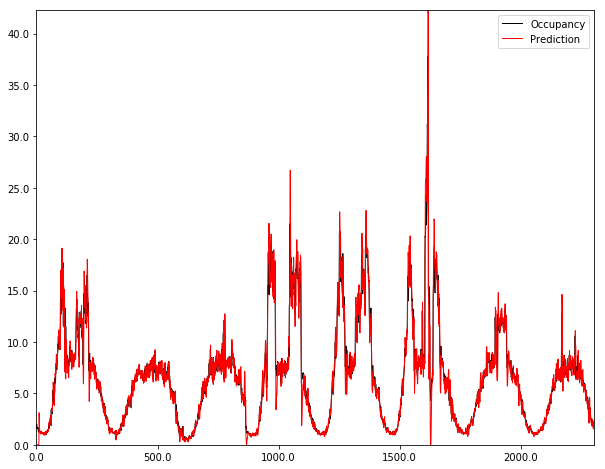

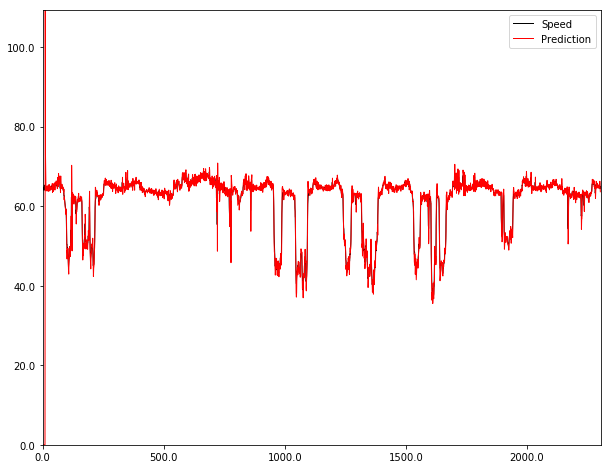

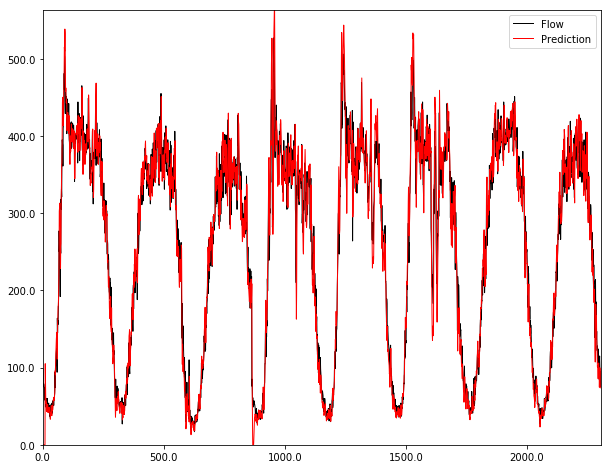

In [236]:
visualize_all(X_400343, best_Y_400343)

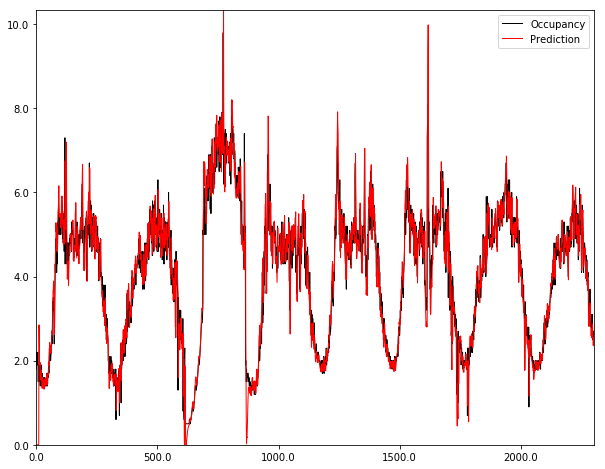

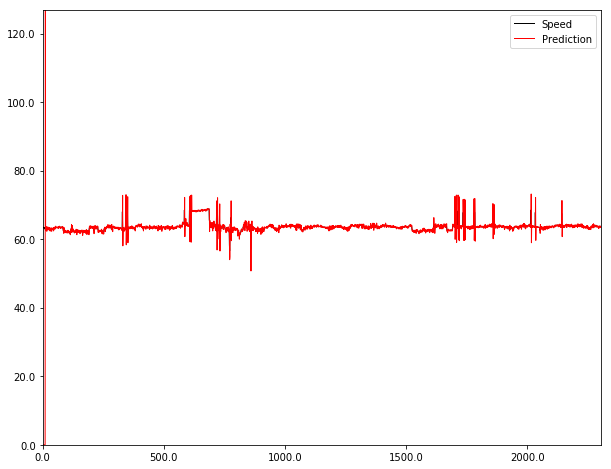

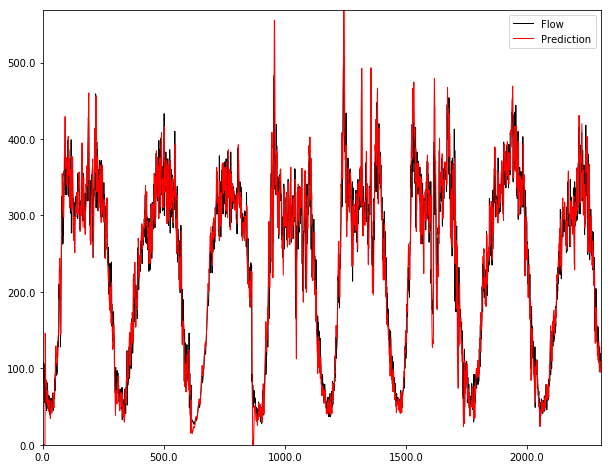

In [237]:
visualize_all(X_401560, best_Y_401560)

# Training TSA for first 8 months

Use the first 8 months data to train alpha:

In [362]:
train_date = days[(days >= datetime.date(2017, 1, 1)) & (days < datetime.date(2017, 9, 1))]

In [363]:
train_date

array([datetime.date(2017, 1, 1), datetime.date(2017, 1, 2),
       datetime.date(2017, 1, 3), datetime.date(2017, 1, 4),
       datetime.date(2017, 1, 5), datetime.date(2017, 1, 6),
       datetime.date(2017, 1, 7), datetime.date(2017, 1, 8),
       datetime.date(2017, 1, 9), datetime.date(2017, 1, 10),
       datetime.date(2017, 1, 11), datetime.date(2017, 1, 12),
       datetime.date(2017, 1, 13), datetime.date(2017, 1, 14),
       datetime.date(2017, 1, 15), datetime.date(2017, 1, 16),
       datetime.date(2017, 1, 17), datetime.date(2017, 1, 18),
       datetime.date(2017, 1, 19), datetime.date(2017, 1, 20),
       datetime.date(2017, 1, 21), datetime.date(2017, 1, 22),
       datetime.date(2017, 1, 23), datetime.date(2017, 1, 24),
       datetime.date(2017, 1, 25), datetime.date(2017, 1, 26),
       datetime.date(2017, 1, 27), datetime.date(2017, 1, 28),
       datetime.date(2017, 1, 29), datetime.date(2017, 1, 30),
       datetime.date(2017, 1, 31), datetime.date(2017, 2, 1),
  

In [364]:
train_data = concat.loc[concat["Date"].isin(train_date) & concat["Station ID"].isin([400343, 401560])]

We thus get the raw data for two stations, between 2017-01-01 and 2017-08-31:

In [365]:
train_data

,Station ID,Date,Time,Occupancy,Flow,Speed
406573,400343,2017-01-01,00:00:00,2.2,95.0,68.6
406574,400343,2017-01-01,00:05:00,1.9,84.0,68.1
406575,400343,2017-01-01,00:10:00,2.1,91.0,68.3
406576,400343,2017-01-01,00:15:00,1.9,80.0,68.1
406577,400343,2017-01-01,00:20:00,1.9,80.0,68.2
406578,400343,2017-01-01,00:25:00,1.7,77.0,68.2
406579,400343,2017-01-01,00:30:00,1.4,65.0,67.9
406580,400343,2017-01-01,00:35:00,1.4,67.0,68.0
406581,400343,2017-01-01,00:40:00,1.6,68.0,68.3
406582,400343,2017-01-01,00:45:00,1.4,63.0,68.0


Now we want to get normal $X$, by replacing timeframe where incidents happen with the data at the same time on the nearest normal day:

In [389]:
normal_train_data = train_data.copy(deep=True)

In [390]:
normal_train_data.loc[normal_train_data["Station ID"] == 400343].index.size

68528

In [391]:
normal_train_data.loc[normal_train_data["Station ID"] == 401560].index.size

68530

In [392]:
for i, date_time in enumerate(date_time_intersection):
    for j, station_id in enumerate([400343, 401560]):
        all_normal_days = [day for day in unaffected_days if day < date_time.date()]
        nearest_normal_day = all_normal_days[-1]
        # query index of the normal day and incident day
        row_incident = normal_train_data.loc[(normal_train_data["Station ID"] == station_id) & (normal_train_data["Date"] == date_time.date()) & (normal_train_data["Time"] == date_time.time())]
        row_normal = normal_train_data.loc[(normal_train_data["Station ID"] == station_id) & (normal_train_data["Date"] == nearest_normal_day) & (normal_train_data["Time"] == date_time.time())]
        if not row_incident.empty and not row_normal.empty:
            print(date_time.date(), nearest_normal_day, date_time.time())
            idx_incident = row_incident.index[0]
            idx_normal = row_incident.index[0]
            # set occupancy, speed and flow
            normal_train_data.at[idx_incident, 'Occupancy'] = normal_train_data.at[idx_normal, 'Occupancy']
            normal_train_data.at[idx_incident, 'Speed'] = normal_train_data.at[idx_normal, 'Speed']
            normal_train_data.at[idx_incident, 'Flow'] = normal_train_data.at[idx_normal, 'Flow']

2017-01-13 2017-01-12 10:50:00
2017-01-13 2017-01-12 10:50:00
2017-01-13 2017-01-12 10:55:00
2017-01-13 2017-01-12 10:55:00
2017-01-13 2017-01-12 11:00:00
2017-01-13 2017-01-12 11:00:00
2017-01-13 2017-01-12 11:25:00
2017-01-13 2017-01-12 11:25:00
2017-01-13 2017-01-12 11:30:00
2017-01-13 2017-01-12 11:30:00
2017-01-13 2017-01-12 11:35:00
2017-01-13 2017-01-12 11:35:00
2017-01-13 2017-01-12 11:40:00
2017-01-13 2017-01-12 11:40:00
2017-01-22 2017-01-21 13:15:00
2017-01-22 2017-01-21 13:15:00
2017-01-22 2017-01-21 13:20:00
2017-01-22 2017-01-21 13:20:00
2017-01-24 2017-01-21 21:00:00
2017-01-24 2017-01-21 21:00:00
2017-01-24 2017-01-21 21:05:00
2017-01-24 2017-01-21 21:05:00
2017-01-24 2017-01-21 21:10:00
2017-01-24 2017-01-21 21:10:00
2017-01-24 2017-01-21 21:15:00
2017-01-24 2017-01-21 21:15:00
2017-01-24 2017-01-21 21:20:00
2017-01-24 2017-01-21 21:20:00
2017-01-24 2017-01-21 21:25:00
2017-01-24 2017-01-21 21:25:00
2017-01-24 2017-01-21 21:30:00
2017-01-24 2017-01-21 21:30:00
2017-01-

2017-02-17 2017-02-13 12:15:00
2017-02-17 2017-02-13 12:20:00
2017-02-17 2017-02-13 12:20:00
2017-02-17 2017-02-13 12:25:00
2017-02-17 2017-02-13 12:25:00
2017-02-17 2017-02-13 12:30:00
2017-02-17 2017-02-13 12:30:00
2017-02-17 2017-02-13 12:35:00
2017-02-17 2017-02-13 12:35:00
2017-02-17 2017-02-13 12:40:00
2017-02-17 2017-02-13 12:40:00
2017-02-17 2017-02-13 12:45:00
2017-02-17 2017-02-13 12:45:00
2017-02-17 2017-02-13 12:50:00
2017-02-17 2017-02-13 12:50:00
2017-02-17 2017-02-13 12:55:00
2017-02-17 2017-02-13 12:55:00
2017-02-17 2017-02-13 13:00:00
2017-02-17 2017-02-13 13:00:00
2017-02-17 2017-02-13 13:05:00
2017-02-17 2017-02-13 13:05:00
2017-02-17 2017-02-13 13:10:00
2017-02-17 2017-02-13 13:10:00
2017-02-17 2017-02-13 13:15:00
2017-02-17 2017-02-13 13:15:00
2017-02-17 2017-02-13 13:20:00
2017-02-17 2017-02-13 13:20:00
2017-02-17 2017-02-13 13:25:00
2017-02-17 2017-02-13 13:25:00
2017-02-17 2017-02-13 13:30:00
2017-02-17 2017-02-13 13:30:00
2017-02-17 2017-02-13 13:35:00
2017-02-

2017-06-27 2017-06-26 15:55:00
2017-06-27 2017-06-26 16:00:00
2017-06-27 2017-06-26 16:00:00
2017-06-27 2017-06-26 16:05:00
2017-06-27 2017-06-26 16:05:00
2017-06-27 2017-06-26 16:10:00
2017-06-27 2017-06-26 16:10:00
2017-06-27 2017-06-26 16:15:00
2017-06-27 2017-06-26 16:15:00
2017-06-27 2017-06-26 16:20:00
2017-06-27 2017-06-26 16:20:00
2017-06-27 2017-06-26 16:25:00
2017-06-27 2017-06-26 16:25:00
2017-06-27 2017-06-26 16:30:00
2017-06-27 2017-06-26 16:30:00
2017-06-27 2017-06-26 16:35:00
2017-06-27 2017-06-26 16:35:00
2017-06-27 2017-06-26 16:40:00
2017-06-27 2017-06-26 16:40:00
2017-06-27 2017-06-26 16:45:00
2017-06-27 2017-06-26 16:45:00
2017-06-28 2017-06-26 19:40:00
2017-06-28 2017-06-26 19:40:00
2017-06-28 2017-06-26 19:45:00
2017-06-28 2017-06-26 19:45:00
2017-06-28 2017-06-26 19:50:00
2017-06-28 2017-06-26 19:50:00
2017-06-28 2017-06-26 19:55:00
2017-06-28 2017-06-26 19:55:00
2017-06-28 2017-06-26 20:00:00
2017-06-28 2017-06-26 20:00:00
2017-07-01 2017-06-30 07:55:00
2017-07-

# Feeding prediction to train SVM

For road segment b/w 400343 and 401560, i.e., B = station 400343, E = station 401560.

At present, we assume $number\ of\ upstream\ stations = m = 0, number\ of\ downstream\ stations = n = 0$ for simplicity.  We also set $k_B = 4\ min$ and $k_E = 2\ min$, as indicated in the paper; however, the time interval in the paper is 1 minute whereas it's 5 minute in this experiment.  Therefore, we can set $k_B = 1$ and $k_E = 1$.

So the feature vector at time $t$ will look like this:
$$Z(m, n, t) = Z(0, 0, t) = [f(B, t-1), f(B, t), f(E, t-1), f(E, t)],$$
where $$f(i, t) = [X(i, t), Y(i, t), DF(i, t)]^T, DF(i, t) = X(i, t) - Y(i, t).$$


The training data is also from 2017.9.1 to 2017.9.10.

## Construct feature vector

Can do this for $t$ from $10$ to $num_{timestamps}$.

First define utility function.

In [249]:
def f(X, Y):
    return np.array([X, Y, X - Y])

### Construct positive samples

Use first 8 months of incident data:
```
1. Find all incidents with 400343 as upstream station and 401560 as downstream from Jan to Aug, in particular, the relevant timestamps (1 addition before, and 1 addition after)
2. Find records of 400343 and 401560 using the timestamps
3. For each timestamp, construct a feature vector, and add it to the list.
```

In [280]:
incidents_400343 = cleaned_concat_incidents.loc[cleaned_concat_incidents["Upstream"].isin([400343])]

In [281]:
incidents_400343

,ID,Date,Time,Duration,Upstream,Upstream_Idx,Downstream,Downstream_Idx,Start DateTime,End DateTime
244,16945233,2017-01-13,10:45:00,00:20:00,400343,4.0,401560.0,5.0,2017-01-13 10:45:00,2017-01-13 11:05:00
248,16945292,2017-01-13,11:21:00,00:22:00,400343,4.0,401560.0,5.0,2017-01-13 11:21:00,2017-01-13 11:43:00
431,16965684,2017-01-22,13:08:00,00:16:00,400343,4.0,401560.0,5.0,2017-01-22 13:08:00,2017-01-22 13:24:00
465,16969104,2017-01-23,16:40:00,00:07:00,400343,4.0,401560.0,5.0,2017-01-23 16:40:00,2017-01-23 16:47:00
503,16971876,2017-01-24,20:55:00,01:23:00,400343,4.0,401560.0,5.0,2017-01-24 20:55:00,2017-01-24 22:18:00
513,16973505,2017-01-25,16:45:00,00:23:00,400343,4.0,401560.0,5.0,2017-01-25 16:45:00,2017-01-25 17:08:00
526,16975271,2017-01-26,13:59:00,01:19:00,400343,4.0,401560.0,5.0,2017-01-26 13:59:00,2017-01-26 15:18:00
664,16994287,2017-02-05,05:51:00,00:31:00,400343,4.0,401560.0,5.0,2017-02-05 05:51:00,2017-02-05 06:22:00
728,17001423,2017-02-08,09:36:00,00:10:00,400343,4.0,401560.0,5.0,2017-02-08 09:36:00,2017-02-08 09:46:00
763,17006209,2017-02-10,09:25:00,00:07:00,400343,4.0,401560.0,5.0,2017-02-10 09:25:00,2017-02-10 09:32:00


In [282]:
cleaned_concat_incidents["Rounded SDT"] = cleaned_concat_incidents["Start DateTime"].dt.round(freq='5min')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [284]:
cleaned_concat_incidents["Rounded EDT"] = cleaned_concat_incidents["End DateTime"].dt.round(freq="5min")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [285]:
cleaned_concat_incidents

,ID,Date,Time,Duration,Upstream,Upstream_Idx,Downstream,Downstream_Idx,Start DateTime,End DateTime,Rounded SDT,Rounded EDT
1,16917196,2017-01-01,02:14:00,00:14:00,400765,97.0,400844.0,98.0,2017-01-01 02:14:00,2017-01-01 02:28:00,2017-01-01 02:15:00,2017-01-01 02:30:00
2,16917233,2017-01-01,02:44:00,00:06:00,400309,30.0,400417.0,31.0,2017-01-01 02:44:00,2017-01-01 02:50:00,2017-01-01 02:45:00,2017-01-01 02:50:00
4,16917615,2017-01-01,09:25:00,00:12:00,408134,61.0,400685.0,62.0,2017-01-01 09:25:00,2017-01-01 09:37:00,2017-01-01 09:25:00,2017-01-01 09:35:00
5,16917677,2017-01-01,10:59:00,00:43:00,401888,38.0,400137.0,39.0,2017-01-01 10:59:00,2017-01-01 11:42:00,2017-01-01 11:00:00,2017-01-01 11:40:00
6,16917744,2017-01-01,11:52:00,00:09:00,408135,57.0,417665.0,58.0,2017-01-01 11:52:00,2017-01-01 12:01:00,2017-01-01 11:50:00,2017-01-01 12:00:00
7,16917873,2017-01-01,13:27:00,00:10:00,400608,83.0,400949.0,84.0,2017-01-01 13:27:00,2017-01-01 13:37:00,2017-01-01 13:25:00,2017-01-01 13:35:00
9,16918100,2017-01-01,17:02:00,00:11:00,401613,48.0,400536.0,49.0,2017-01-01 17:02:00,2017-01-01 17:13:00,2017-01-01 17:00:00,2017-01-01 17:15:00
13,16919709,2017-01-02,17:56:00,00:08:00,400928,53.0,400284.0,54.0,2017-01-02 17:56:00,2017-01-02 18:04:00,2017-01-02 17:55:00,2017-01-02 18:05:00
17,16920394,2017-01-03,06:01:00,01:03:00,402828,23.0,407219.0,24.0,2017-01-03 06:01:00,2017-01-03 07:04:00,2017-01-03 06:00:00,2017-01-03 07:05:00
18,16920449,2017-01-03,06:42:00,00:11:00,402828,23.0,407219.0,24.0,2017-01-03 06:42:00,2017-01-03 06:53:00,2017-01-03 06:40:00,2017-01-03 06:55:00


In [286]:
cleaned_concat_incidents.to_csv("data/I88N-processed/cleaned_incidents.csv", index=False)

In [288]:
incidents_400343 = cleaned_concat_incidents.loc[cleaned_concat_incidents["Upstream"].isin([400343])]

In [290]:
incidents_400343_train = incidents_400343.loc[incidents_400343["Date"] < datetime.date(2017, 9, 1)]

In [291]:
incidents_400343_train

,ID,Date,Time,Duration,Upstream,Upstream_Idx,Downstream,Downstream_Idx,Start DateTime,End DateTime,Rounded SDT,Rounded EDT
244,16945233,2017-01-13,10:45:00,00:20:00,400343,4.0,401560.0,5.0,2017-01-13 10:45:00,2017-01-13 11:05:00,2017-01-13 10:45:00,2017-01-13 11:05:00
248,16945292,2017-01-13,11:21:00,00:22:00,400343,4.0,401560.0,5.0,2017-01-13 11:21:00,2017-01-13 11:43:00,2017-01-13 11:20:00,2017-01-13 11:45:00
431,16965684,2017-01-22,13:08:00,00:16:00,400343,4.0,401560.0,5.0,2017-01-22 13:08:00,2017-01-22 13:24:00,2017-01-22 13:10:00,2017-01-22 13:25:00
465,16969104,2017-01-23,16:40:00,00:07:00,400343,4.0,401560.0,5.0,2017-01-23 16:40:00,2017-01-23 16:47:00,2017-01-23 16:40:00,2017-01-23 16:45:00
503,16971876,2017-01-24,20:55:00,01:23:00,400343,4.0,401560.0,5.0,2017-01-24 20:55:00,2017-01-24 22:18:00,2017-01-24 20:55:00,2017-01-24 22:20:00
513,16973505,2017-01-25,16:45:00,00:23:00,400343,4.0,401560.0,5.0,2017-01-25 16:45:00,2017-01-25 17:08:00,2017-01-25 16:45:00,2017-01-25 17:10:00
526,16975271,2017-01-26,13:59:00,01:19:00,400343,4.0,401560.0,5.0,2017-01-26 13:59:00,2017-01-26 15:18:00,2017-01-26 14:00:00,2017-01-26 15:20:00
664,16994287,2017-02-05,05:51:00,00:31:00,400343,4.0,401560.0,5.0,2017-02-05 05:51:00,2017-02-05 06:22:00,2017-02-05 05:50:00,2017-02-05 06:20:00
728,17001423,2017-02-08,09:36:00,00:10:00,400343,4.0,401560.0,5.0,2017-02-08 09:36:00,2017-02-08 09:46:00,2017-02-08 09:35:00,2017-02-08 09:45:00
763,17006209,2017-02-10,09:25:00,00:07:00,400343,4.0,401560.0,5.0,2017-02-10 09:25:00,2017-02-10 09:32:00,2017-02-10 09:25:00,2017-02-10 09:30:00


In [295]:
list_of_timestamp = []
for idx, row in incidents_400343_train.iterrows():
    start_time = row["Rounded SDT"]
    end_time = row["Rounded EDT"]
    while start_time < end_time:
        list_of_timestamp.append(start_time)
        start_time += timedelta(minutes=5)

In [307]:
len(list_of_timestamp)

412

For each timestamp, construct feature vector $Z(0, 0, t)$:

In [299]:
df = concat.loc[concat["Station ID"].isin([400343, 401560])]

In [341]:
date_time = []
for idx, row in df.iterrows():
    date_time.append(datetime.datetime.combine(row["Date"], row["Time"]))
date_time = np.array(date_time)
df["Start DateTime"] = date_time

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [342]:
date_time_intersection = [dt for dt in list_of_timestamp if (dt in date_time and (dt - datetime.timedelta(minutes=5)) in date_time)]

In [343]:
len(date_time_intersection)

372

In [344]:
df = df.loc[df["Start DateTime"].isin(date_time_intersection)]

In [345]:
# construct features
features = np.zeros((36,372))
y = np.ones(372)
k_B = 1
k_E = 1
for i, ts in enumerate(date_time_intersection):
    # generate the list of date and time
    z = []
    date_time = []
    for j in range(k_B, -1, -1):
        date_time.append(ts - datetime.timedelta(minutes=5*j))
    for j, t in enumerate(date_time):
        row_0 = df.loc[(df["Station ID"] == 400343) & (df["Start DateTime"] == t)]
        if not row_0.empty:
            # This is for X
            occupancy = row_0["Occupancy"].values[0]
            speed = row_0["Speed"].values[0]
            flow = row_0["Flow"].values[0]
            X = np.array([occupancy, speed, flow])
            Y = 
            predict_occ = 
            predict_speed =
            predict_flow = 
            # This is for Y
            z.append()
    for j, t in enumerate(date_time):
        row_1 = df.loc[(df["Station ID"] == 401560) & (df["Start DateTime"] == t)]
        if not row_1.empty:
            z.append(row_1["Occupancy"].values[0])
            z.append(row_1["Speed"].values[0])
            z.append(row_1["Flow"].values[0])
    if len(z) == 12:
        features[:, i] = np.array(z).reshape((12,))

[Timestamp('2017-01-13 10:45:00'), Timestamp('2017-01-13 10:50:00')]
[Timestamp('2017-01-13 10:50:00'), Timestamp('2017-01-13 10:55:00')]
[Timestamp('2017-01-13 10:55:00'), Timestamp('2017-01-13 11:00:00')]
[Timestamp('2017-01-13 11:20:00'), Timestamp('2017-01-13 11:25:00')]
[Timestamp('2017-01-13 11:25:00'), Timestamp('2017-01-13 11:30:00')]
[Timestamp('2017-01-13 11:30:00'), Timestamp('2017-01-13 11:35:00')]
[Timestamp('2017-01-13 11:35:00'), Timestamp('2017-01-13 11:40:00')]
[Timestamp('2017-01-22 13:10:00'), Timestamp('2017-01-22 13:15:00')]
[Timestamp('2017-01-22 13:15:00'), Timestamp('2017-01-22 13:20:00')]
[Timestamp('2017-01-24 20:55:00'), Timestamp('2017-01-24 21:00:00')]
[Timestamp('2017-01-24 21:00:00'), Timestamp('2017-01-24 21:05:00')]
[Timestamp('2017-01-24 21:05:00'), Timestamp('2017-01-24 21:10:00')]
[Timestamp('2017-01-24 21:10:00'), Timestamp('2017-01-24 21:15:00')]
[Timestamp('2017-01-24 21:15:00'), Timestamp('2017-01-24 21:20:00')]
[Timestamp('2017-01-24 21:20:00'),

[Timestamp('2017-02-17 11:50:00'), Timestamp('2017-02-17 11:55:00')]
[Timestamp('2017-02-17 11:55:00'), Timestamp('2017-02-17 12:00:00')]
[Timestamp('2017-02-17 12:00:00'), Timestamp('2017-02-17 12:05:00')]
[Timestamp('2017-02-17 12:05:00'), Timestamp('2017-02-17 12:10:00')]
[Timestamp('2017-02-17 12:10:00'), Timestamp('2017-02-17 12:15:00')]
[Timestamp('2017-02-17 12:15:00'), Timestamp('2017-02-17 12:20:00')]
[Timestamp('2017-02-17 12:20:00'), Timestamp('2017-02-17 12:25:00')]
[Timestamp('2017-02-17 12:25:00'), Timestamp('2017-02-17 12:30:00')]
[Timestamp('2017-02-17 12:30:00'), Timestamp('2017-02-17 12:35:00')]
[Timestamp('2017-02-17 12:35:00'), Timestamp('2017-02-17 12:40:00')]
[Timestamp('2017-02-17 12:40:00'), Timestamp('2017-02-17 12:45:00')]
[Timestamp('2017-02-17 12:45:00'), Timestamp('2017-02-17 12:50:00')]
[Timestamp('2017-02-17 12:50:00'), Timestamp('2017-02-17 12:55:00')]
[Timestamp('2017-02-17 12:55:00'), Timestamp('2017-02-17 13:00:00')]
[Timestamp('2017-02-17 13:00:00'),

[Timestamp('2017-06-27 16:15:00'), Timestamp('2017-06-27 16:20:00')]
[Timestamp('2017-06-27 16:20:00'), Timestamp('2017-06-27 16:25:00')]
[Timestamp('2017-06-27 16:25:00'), Timestamp('2017-06-27 16:30:00')]
[Timestamp('2017-06-27 16:30:00'), Timestamp('2017-06-27 16:35:00')]
[Timestamp('2017-06-27 16:35:00'), Timestamp('2017-06-27 16:40:00')]
[Timestamp('2017-06-27 16:40:00'), Timestamp('2017-06-27 16:45:00')]
[Timestamp('2017-06-28 19:35:00'), Timestamp('2017-06-28 19:40:00')]
[Timestamp('2017-06-28 19:40:00'), Timestamp('2017-06-28 19:45:00')]
[Timestamp('2017-06-28 19:45:00'), Timestamp('2017-06-28 19:50:00')]
[Timestamp('2017-06-28 19:50:00'), Timestamp('2017-06-28 19:55:00')]
[Timestamp('2017-06-28 19:55:00'), Timestamp('2017-06-28 20:00:00')]
[Timestamp('2017-07-01 07:50:00'), Timestamp('2017-07-01 07:55:00')]
[Timestamp('2017-07-05 13:25:00'), Timestamp('2017-07-05 13:30:00')]
[Timestamp('2017-07-05 13:30:00'), Timestamp('2017-07-05 13:35:00')]
[Timestamp('2017-07-06 14:55:00'),

### Construct negative samples

## Use sklearn svm for training

In [247]:
from sklearn.svm import SVC